# Credit Card Default Prediction
### Importing libraries

In [310]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleaning

In [311]:
# Reading the CSV file
data = pd.read_csv('UCI_Credit_Card.csv')
# Size of the data
print('Size of the data: ',data.shape)

Size of the data:  (30000, 25)


- There are 30000 Rows/Clients and 25 features/columns

In [312]:
# Sample data
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [313]:
# Looking at Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [314]:
# Renaming Columns
data = data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'})

In [315]:
# Checking for any null values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

- There are no null values found

In [316]:
# Categories of Categorical Features
print('Repayment Status: ',data['PAY_1'].unique())
print('Marriage: ',data['MARRIAGE'].unique())
print('Gender: ',data['SEX'].unique())
print('Education: ',data['EDUCATION'].unique())
print('Target Default: ',data['default'].unique())

Repayment Status:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage:  [1 2 3 0]
Gender:  [2 1]
Education:  [2 1 3 5 4 6 0]
Target Default:  [1 0]


# Exploratory Data Analysis

In [317]:
# Categorizing unnecessary values
others = [0, 5, 6]
# Replace values in Education Column
data.loc[data['EDUCATION'].isin(others), 'EDUCATION'] = 4

In [318]:
# Replacing unnecessary values in Marriage Column
data['MARRIAGE'] = data['MARRIAGE'].replace(0,3)

In [319]:
data_ml = data.copy()

## Distribution of target variable 'default'

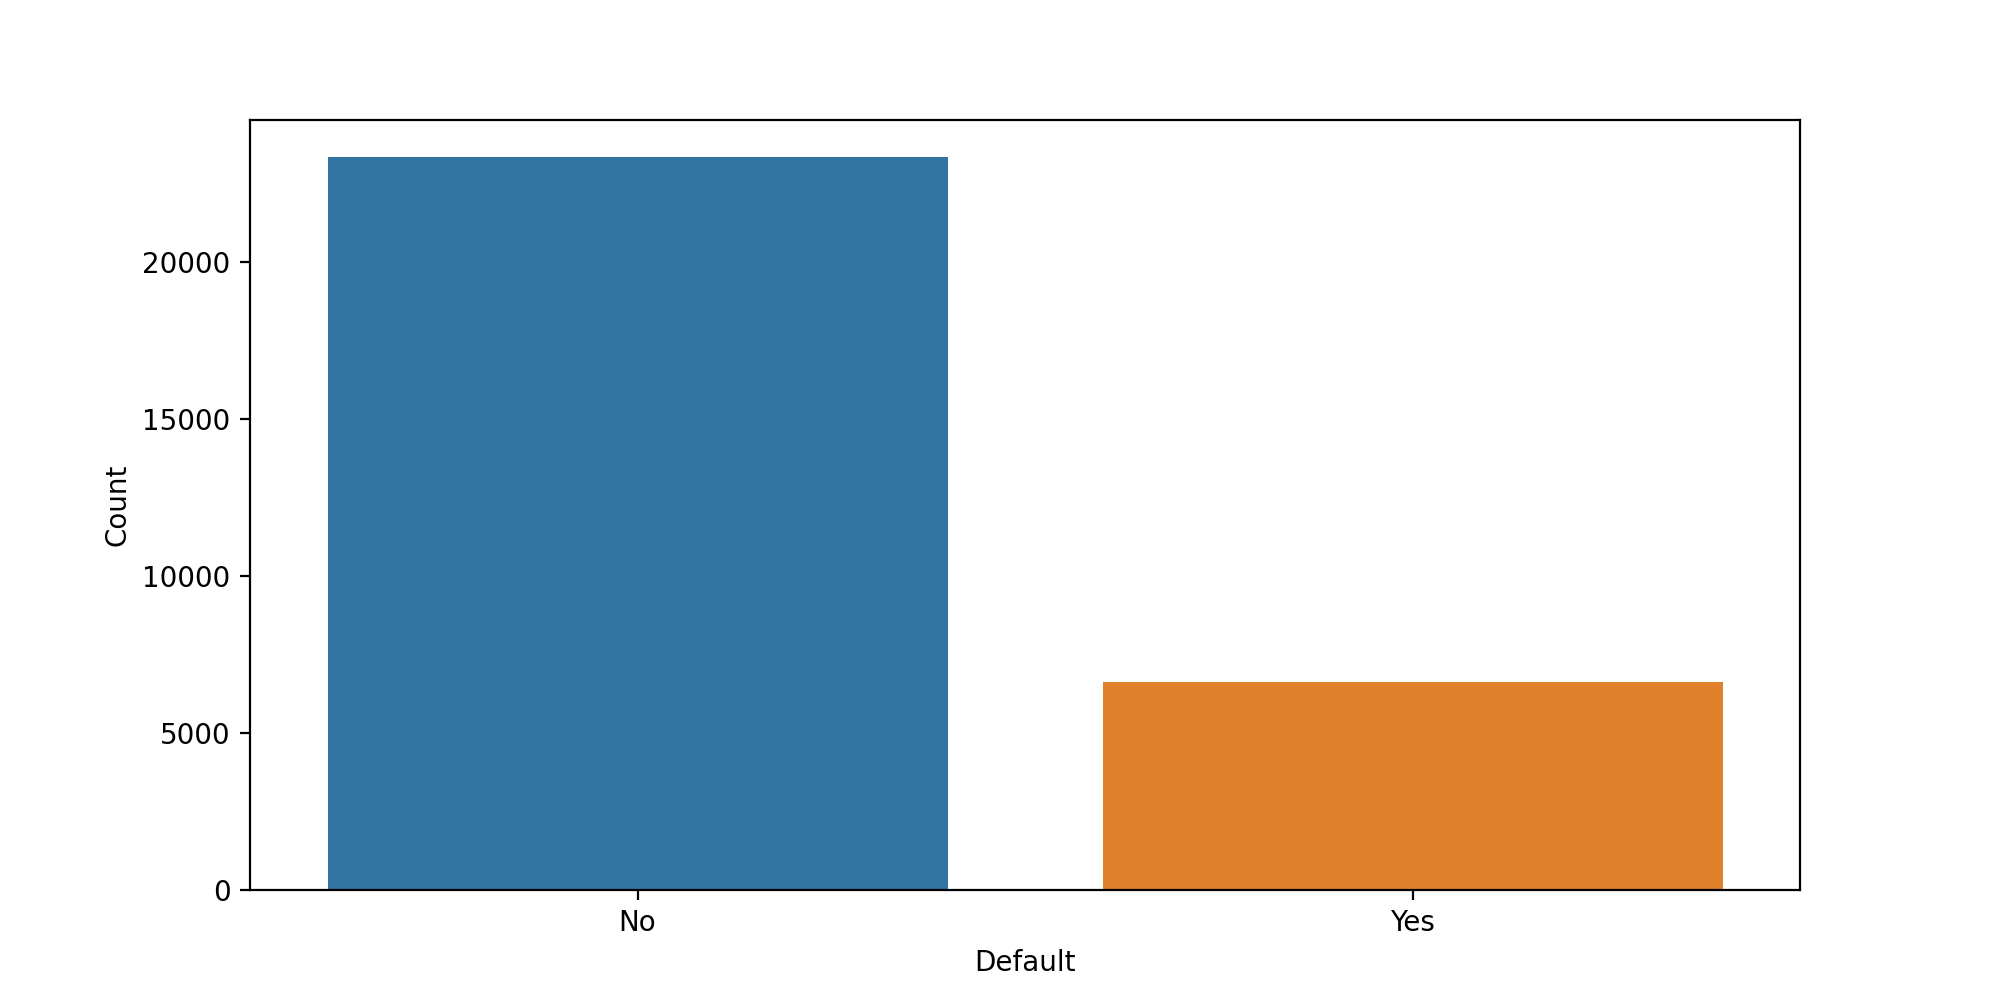

In [320]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default', data = data)
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* We can observe that the data is unbalanced

## Insights on Age

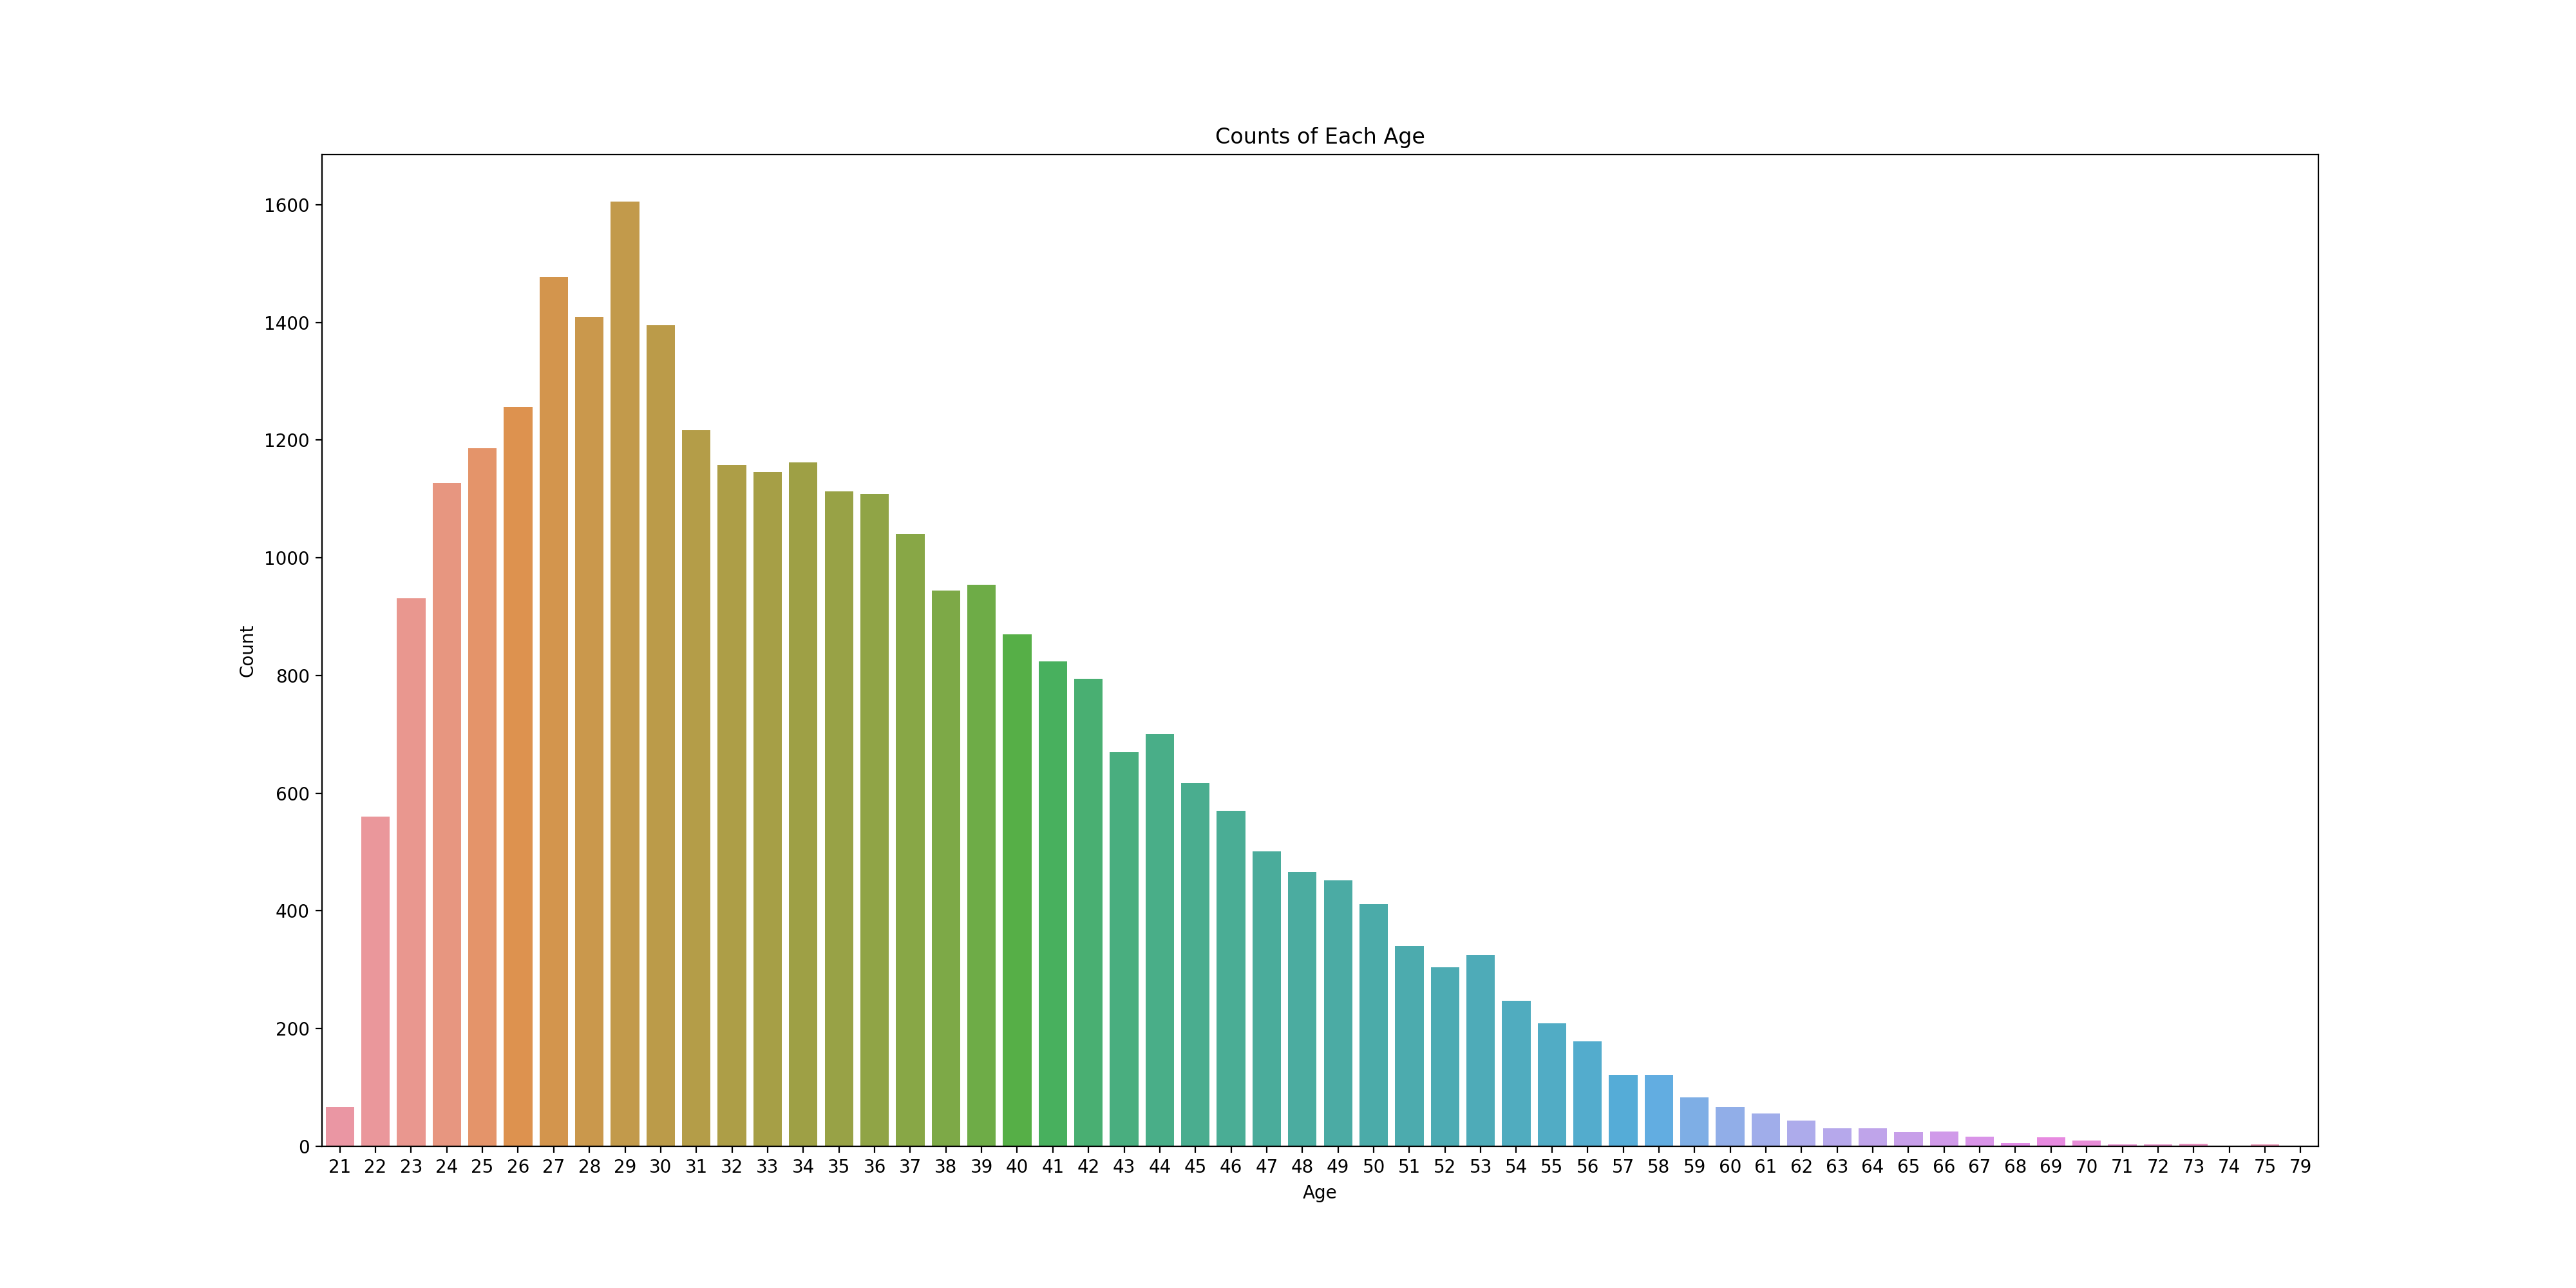

In [321]:
# Count occurrences of each age
age_counts = data['AGE'].value_counts().reset_index()

# Plot the bar plot using seaborn
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(x='index', y='AGE', data=age_counts)
plt.title("Counts of Each Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

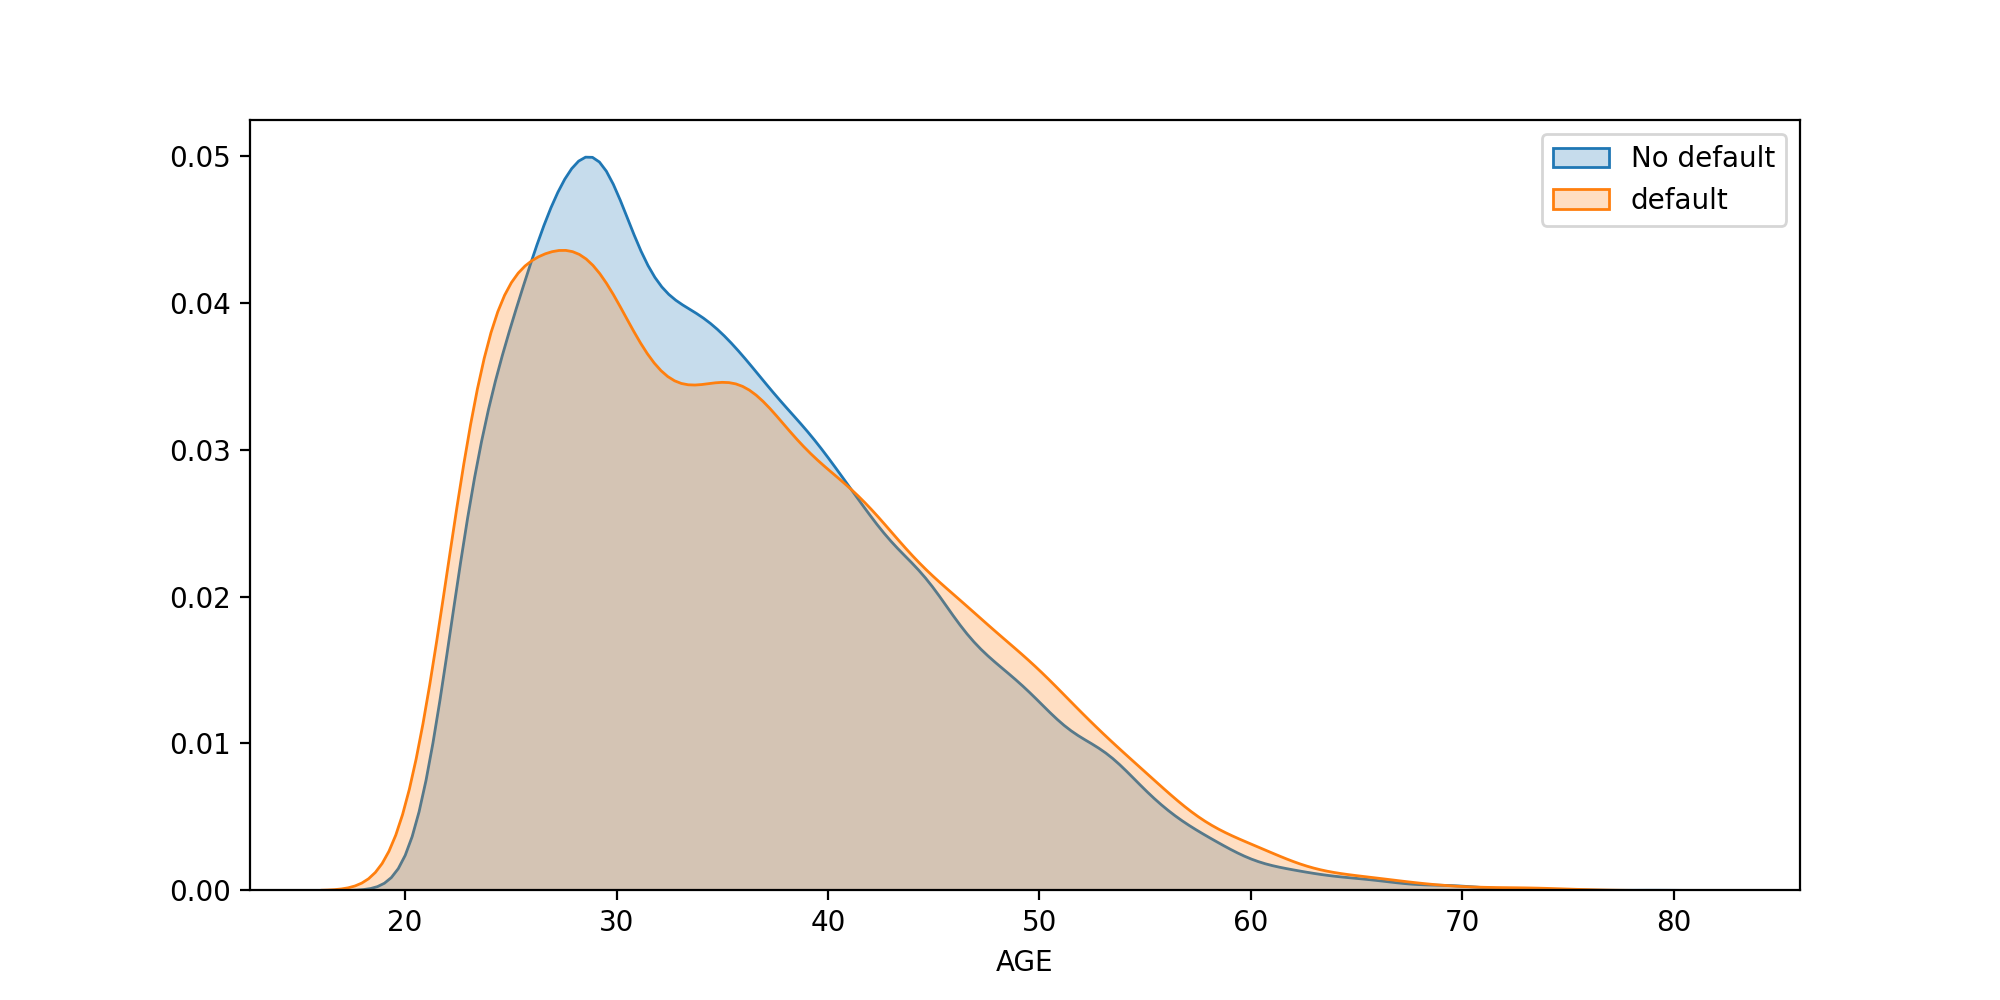

In [322]:
plt.figure(figsize=(10,5))
sns.kdeplot(data.loc[(data['default'] == 0), 'AGE'], label = 'No default', fill = True)
sns.kdeplot(data.loc[(data['default'] == 1), 'AGE'], label = 'default', fill = True)
plt.ylabel('')
plt.legend()
plt.show()

In [323]:
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [328]:
data['default'].groupby(data['AgeBin']).value_counts(normalize = True)

AgeBin    default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: default, dtype: float64

<Figure size 1200x400 with 0 Axes>

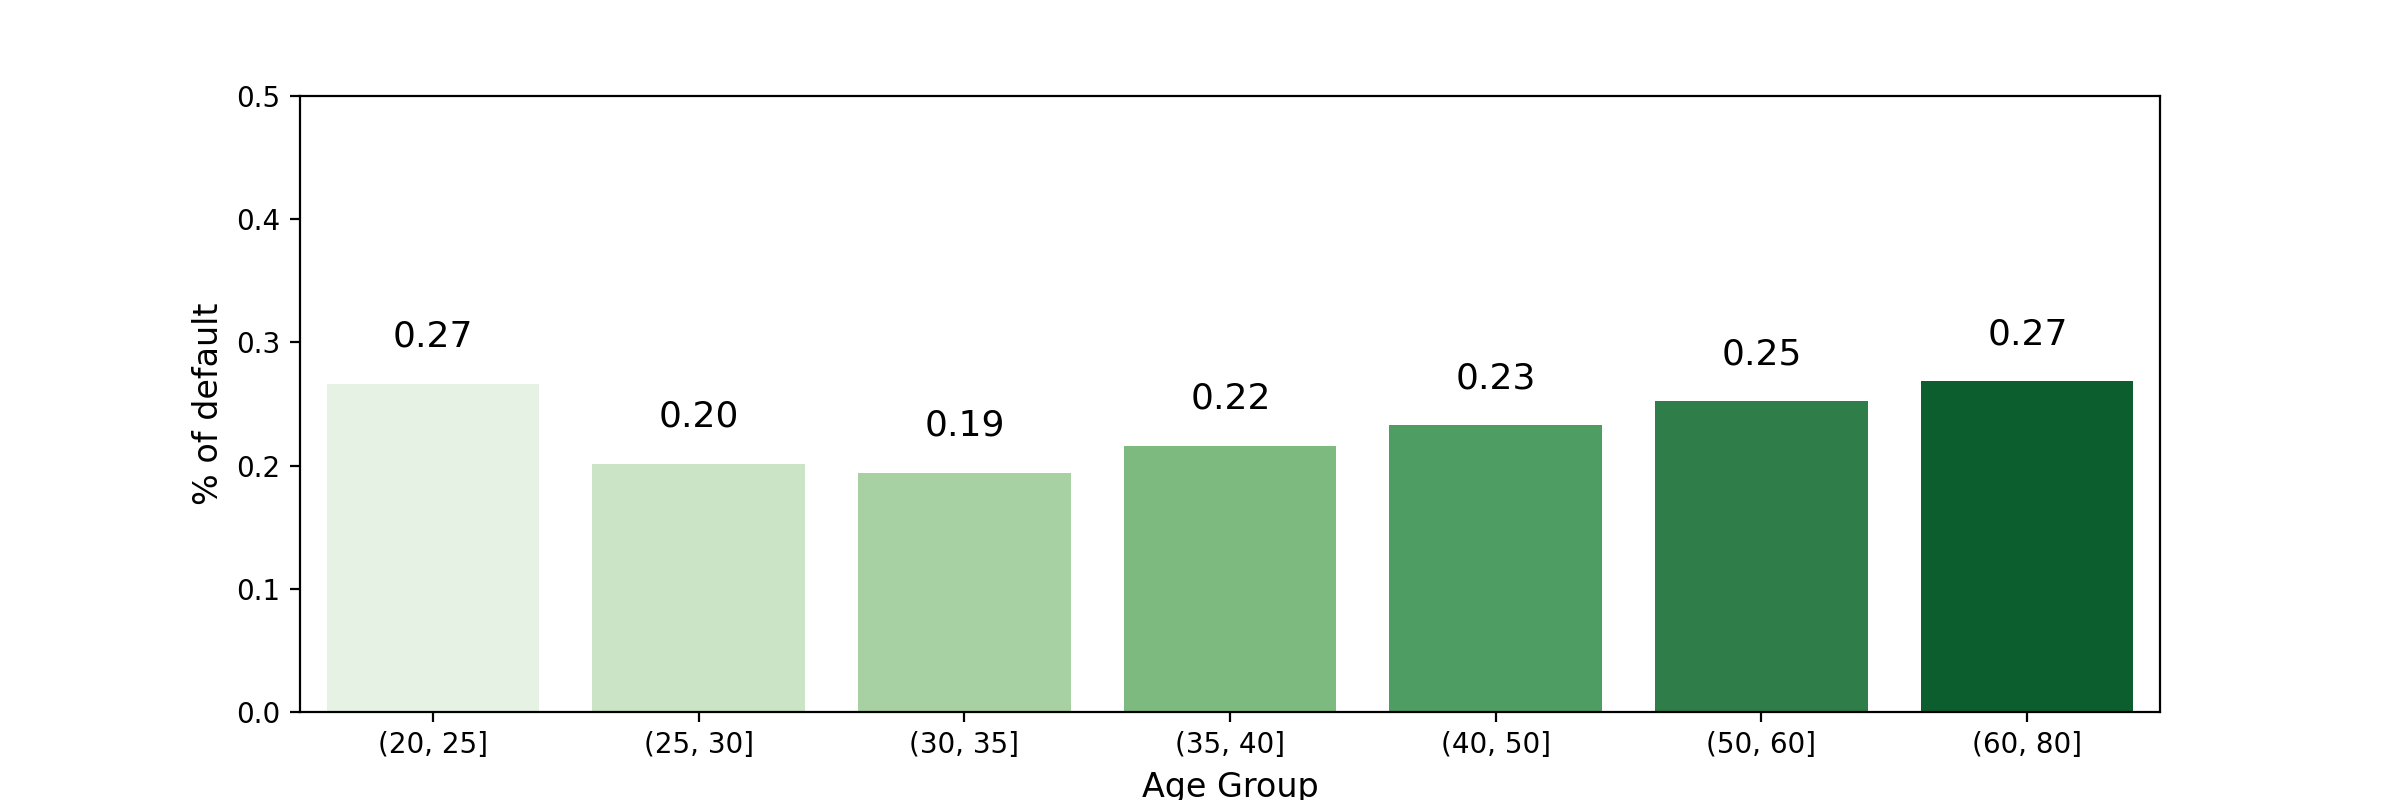

In [330]:
plt.figure(figsize=(12,4))
data['AgeBin'] = data['AgeBin'].astype('str')
plt.figure(figsize=(12,4))
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
ax = sns.barplot(x = "AgeBin", y = "default", data = data, palette = 'Greens', errorbar=None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

* We can observe that the age group of 30-35 years old has lowest chances for defaulting, while the highest occur at the extremes(20-25 and 60+)

In [265]:
# Renaming for visualization
data_dup = data
data_dup.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

## Insights on Gender

<Figure size 1000x500 with 0 Axes>

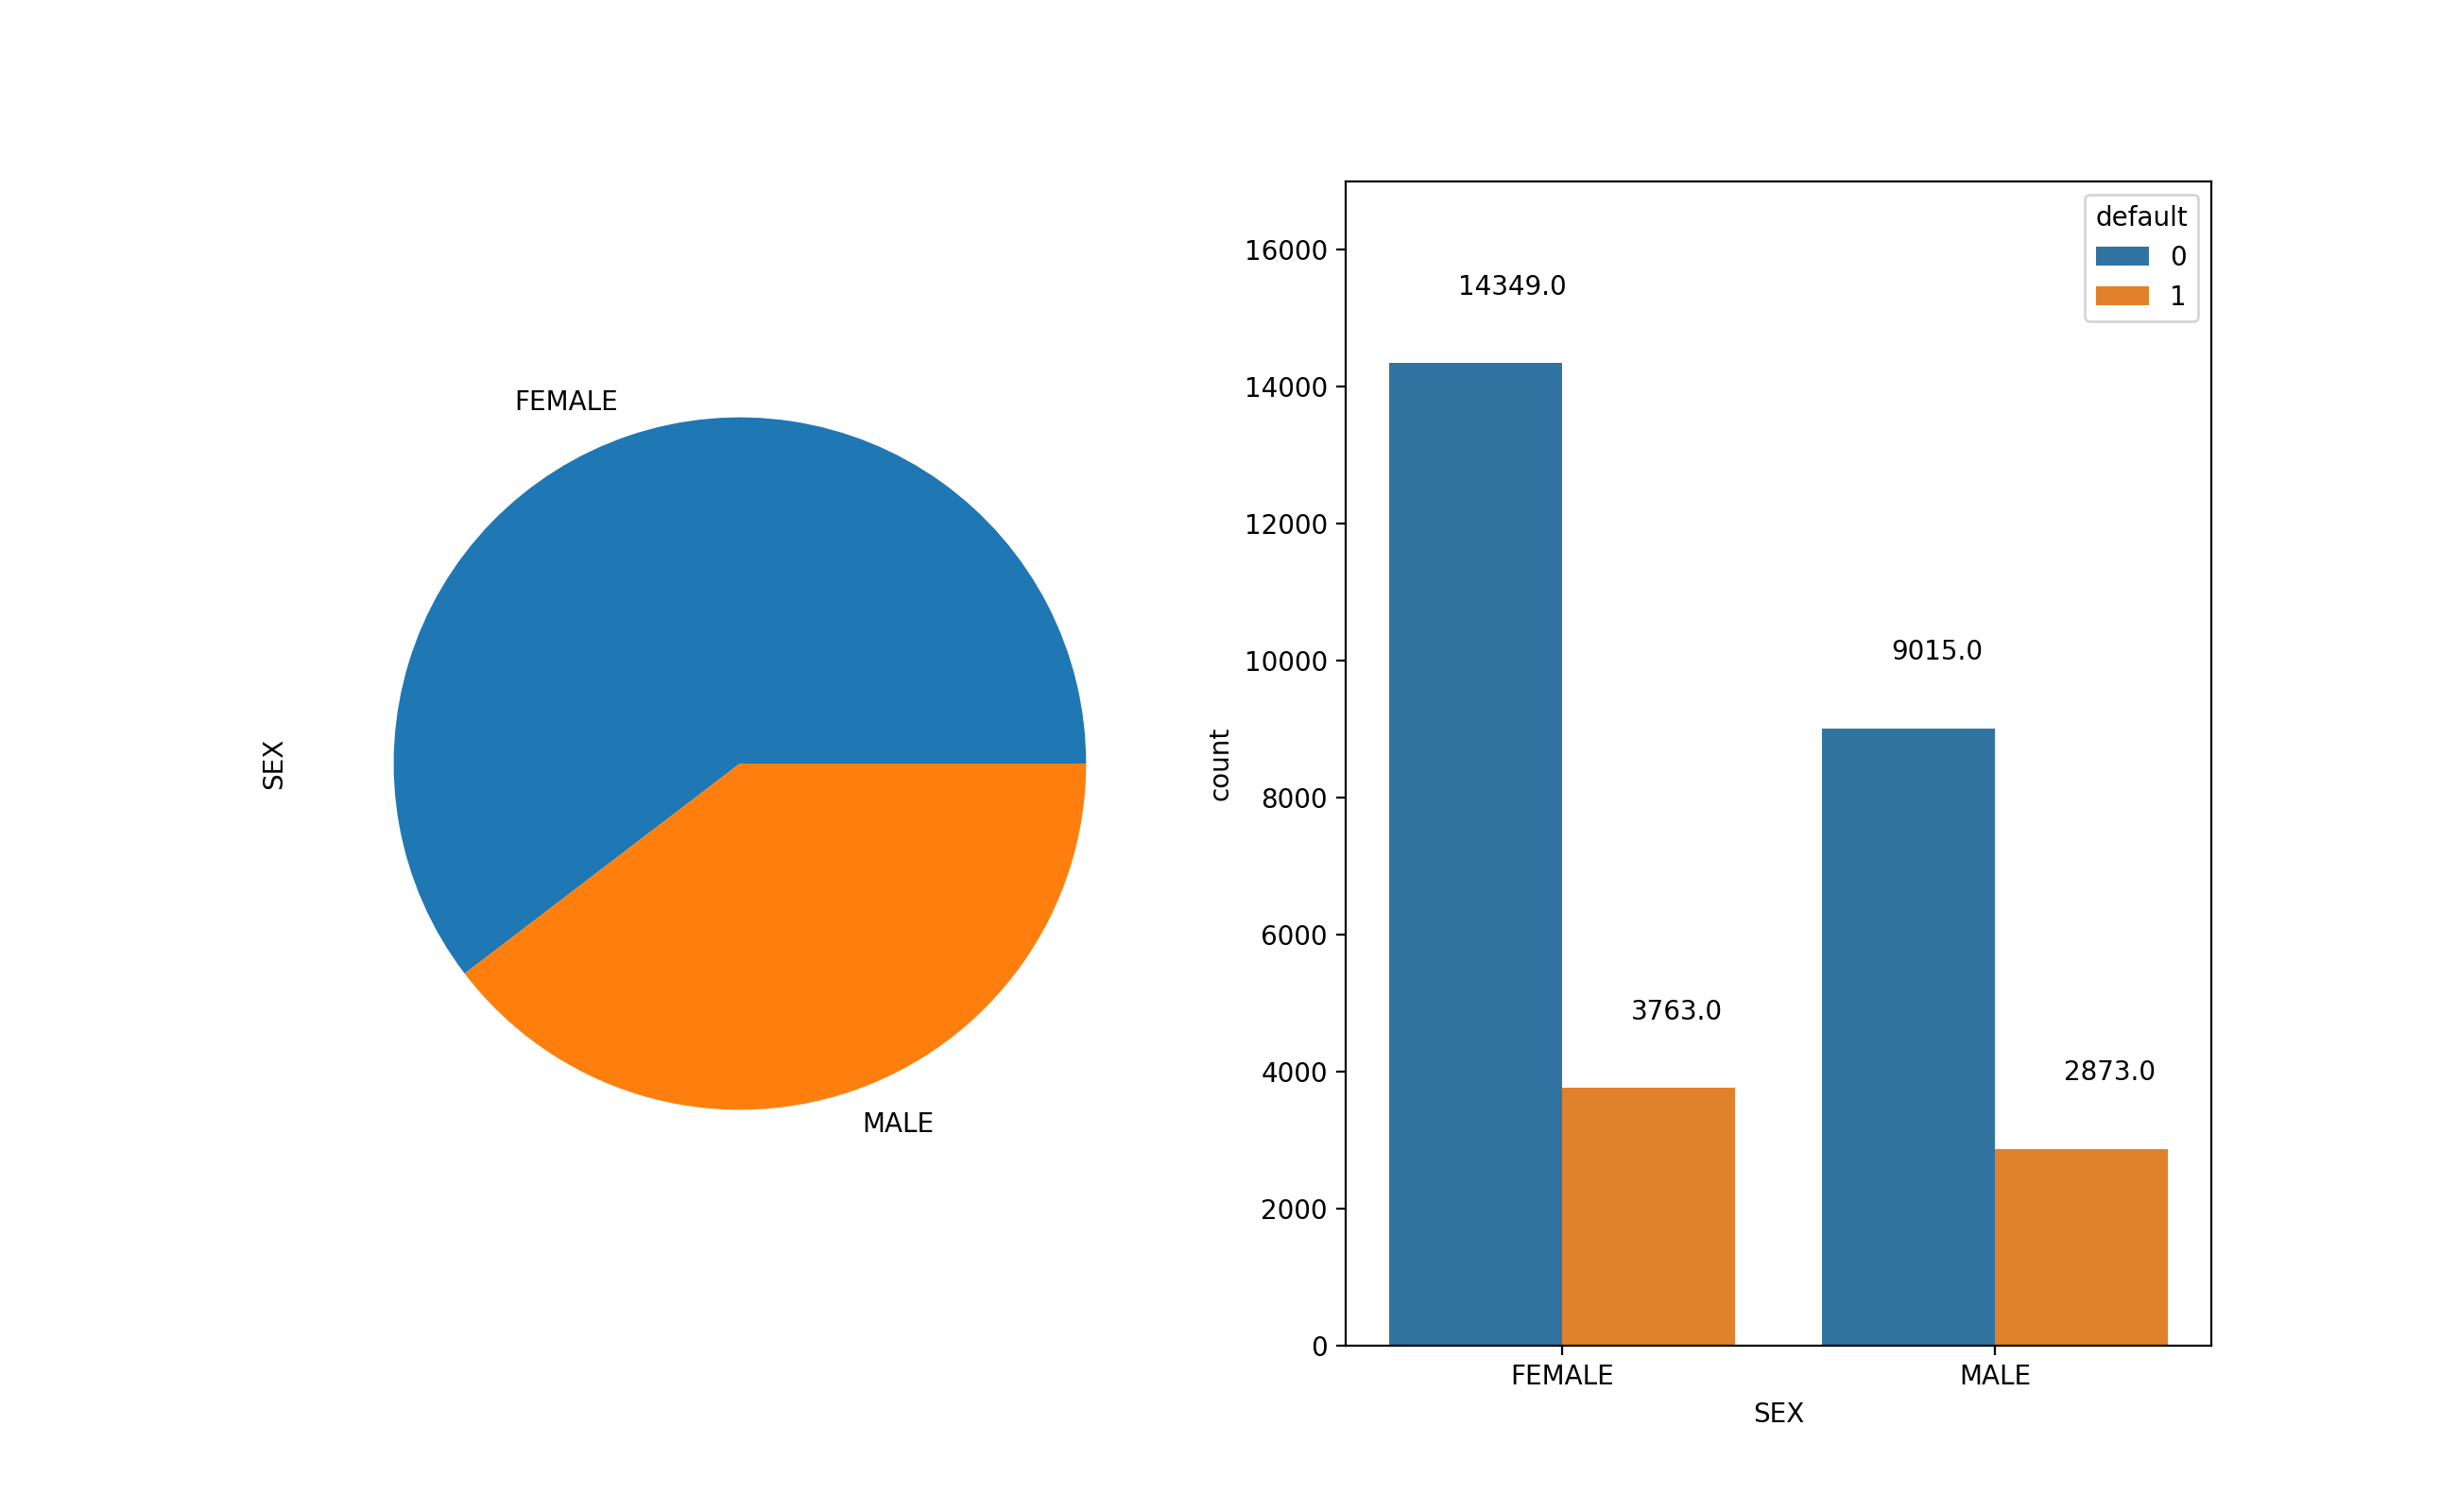

In [266]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
data_dup['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
ax = sns.countplot(x = 'SEX', hue = 'default', data = data_dup)
plt.ylim(0,17000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

In [267]:
data['default'].groupby(data['SEX']).value_counts(normalize = True)

SEX     default
FEMALE  0          0.792237
        1          0.207763
MALE    0          0.758328
        1          0.241672
Name: default, dtype: float64

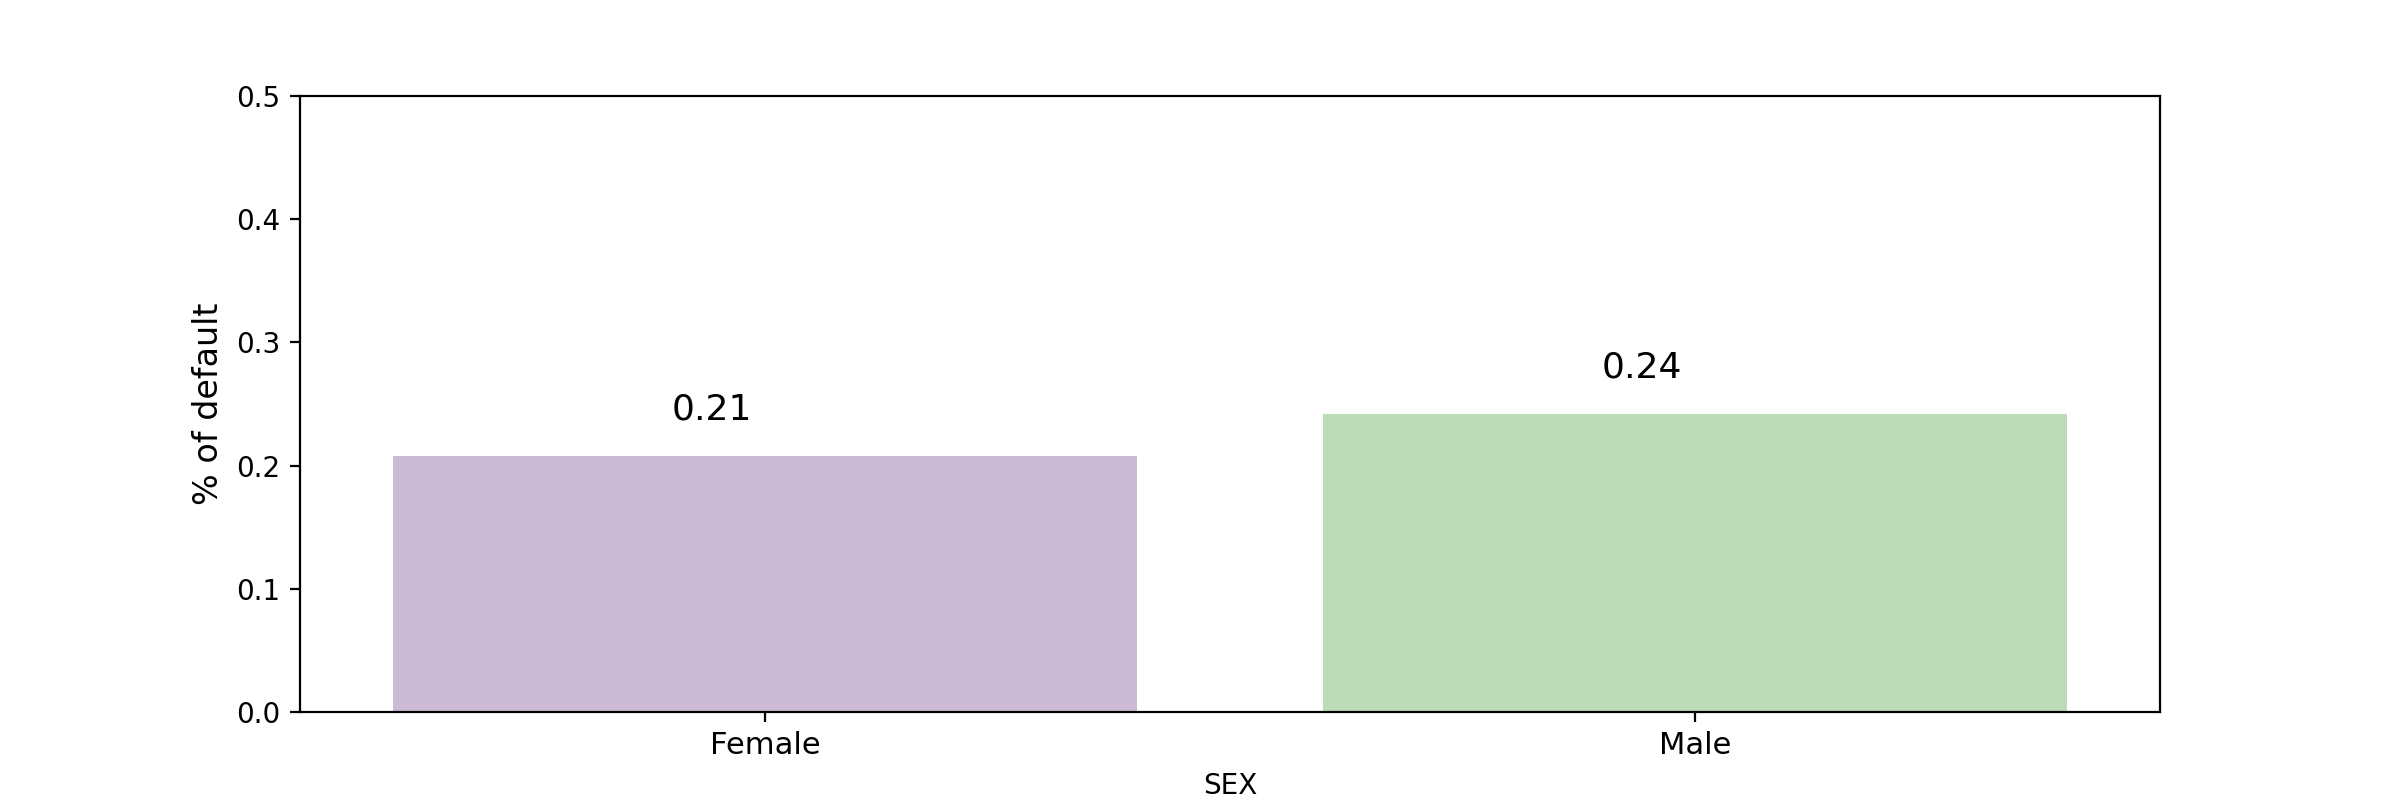

In [268]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default", data = data, palette='PRGn', errorbar=None)

plt.ylabel("% of default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Female', 'Male'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

* There are more women than men in the dataset and, men have a slightly higher chance of default.

## Insights on Marital Status

<Figure size 1000x500 with 0 Axes>

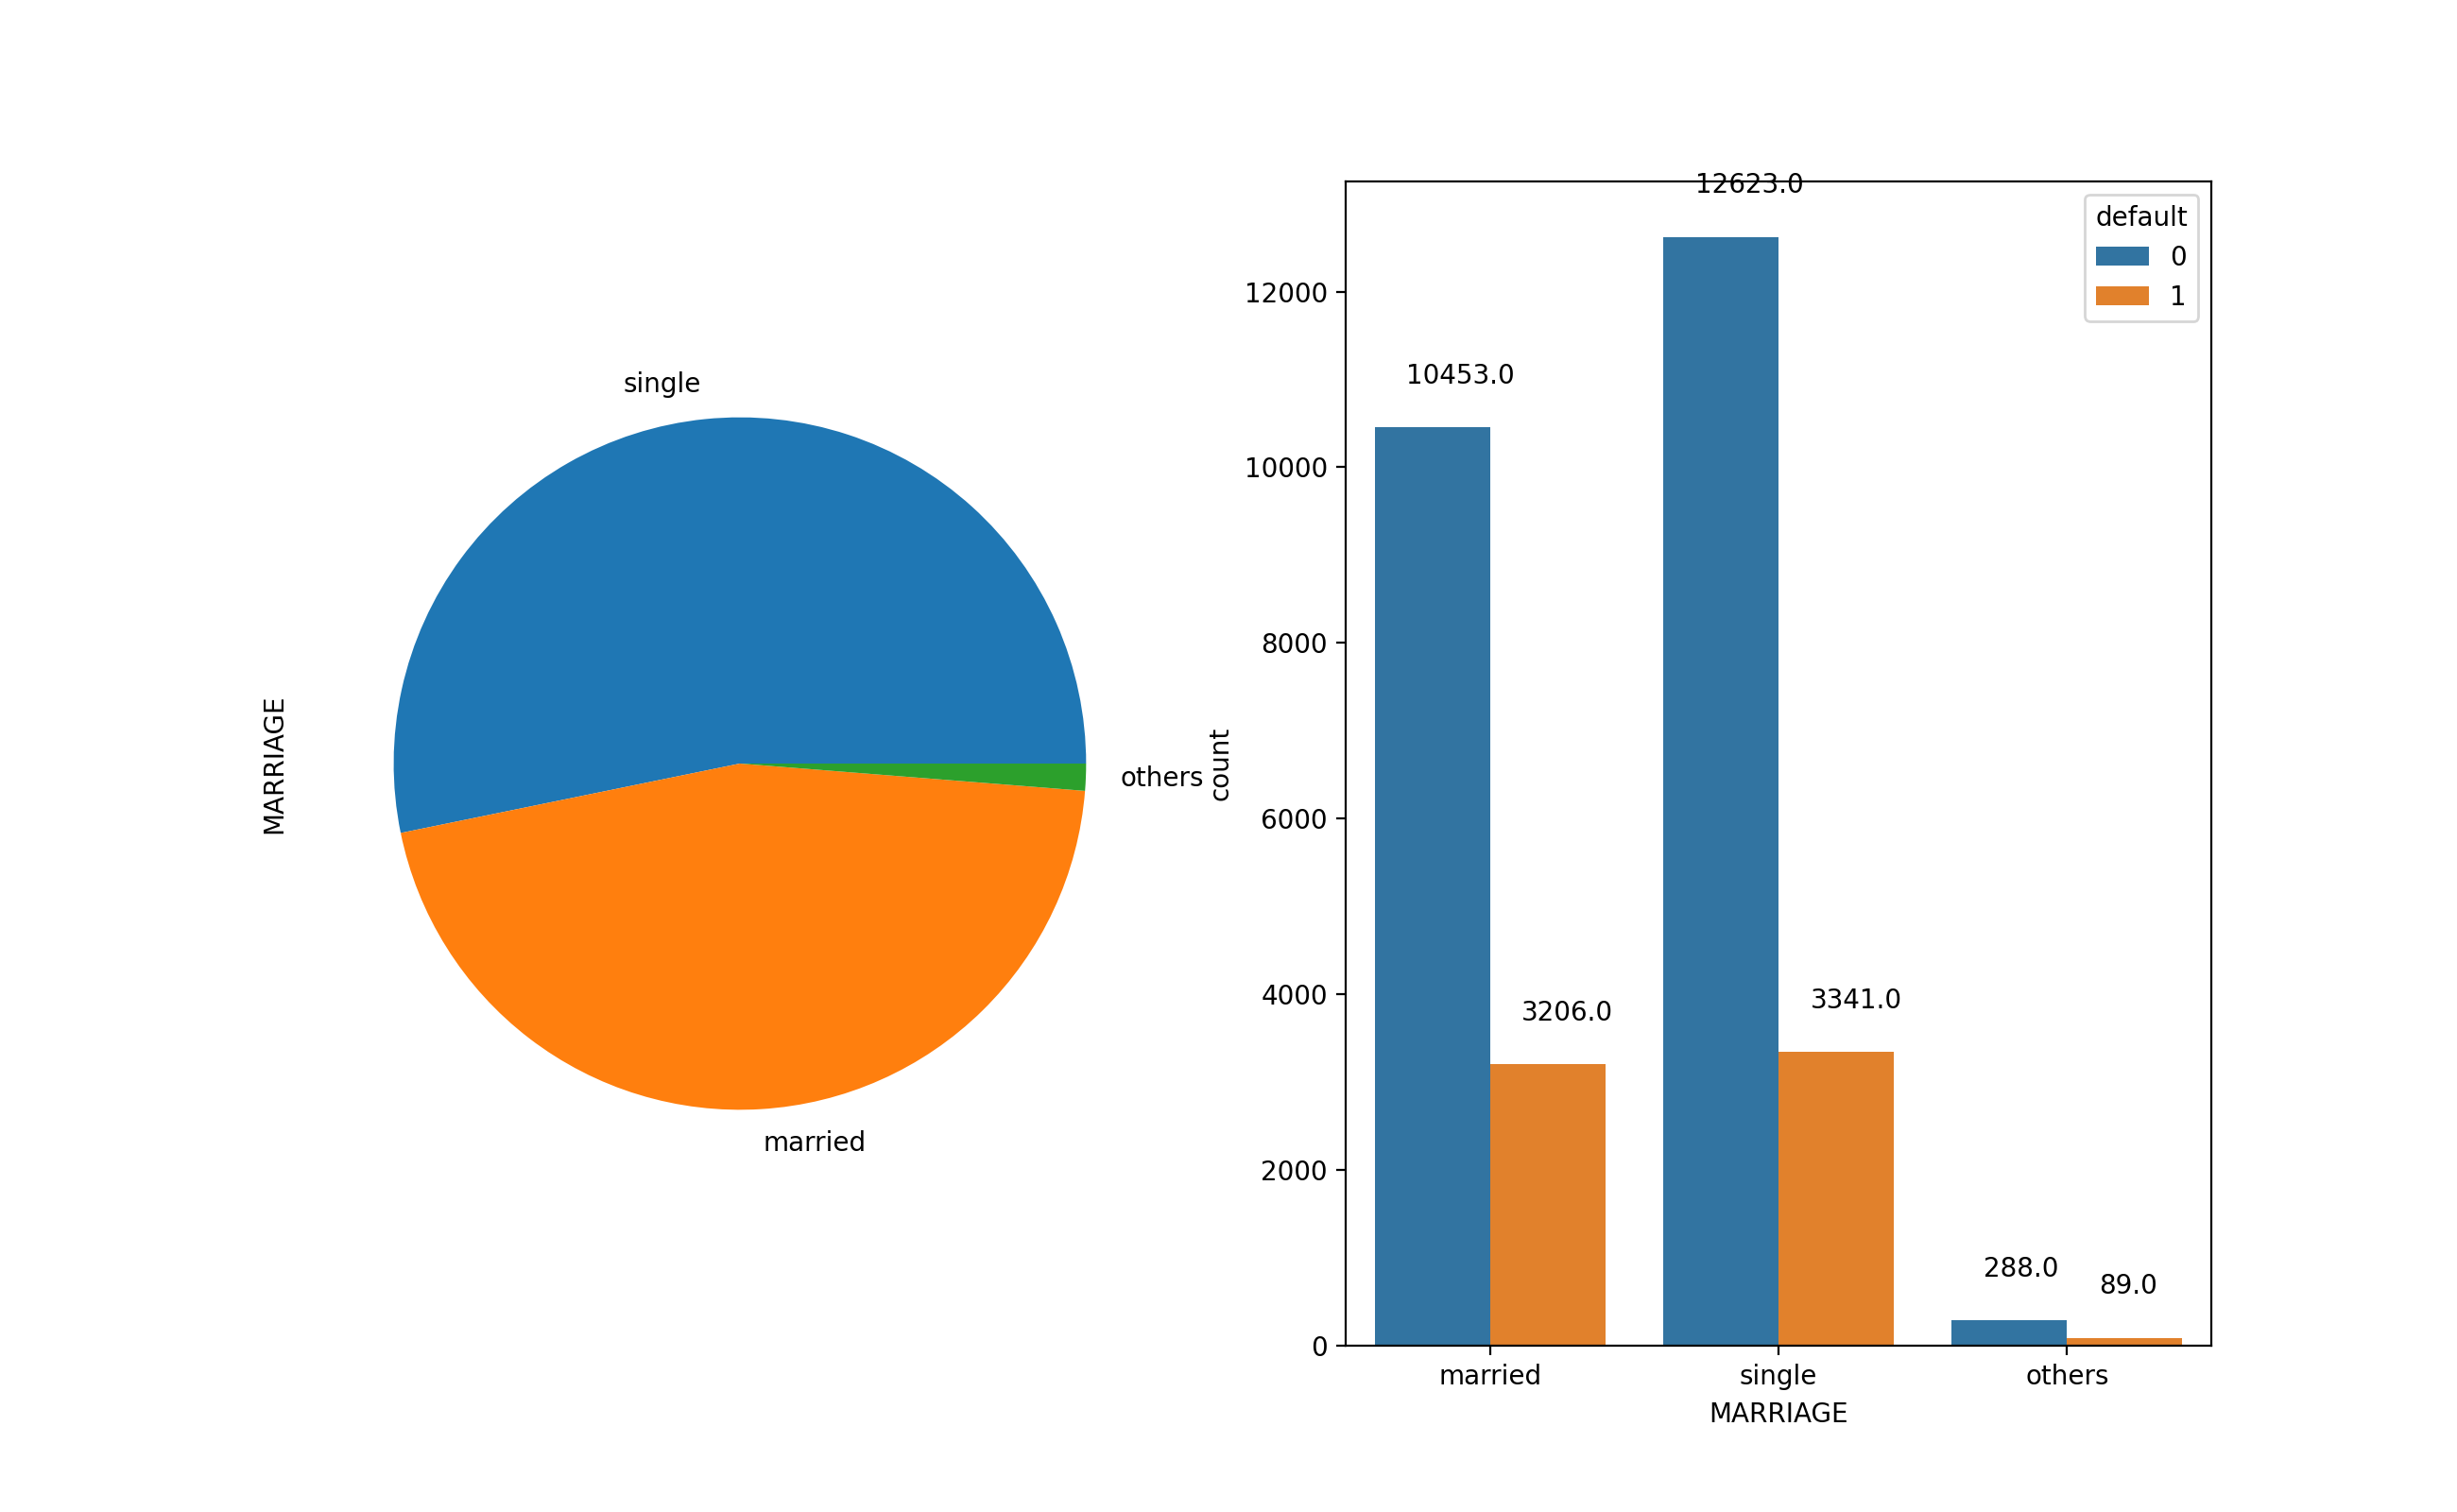

In [269]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
data_dup['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
ax = sns.countplot(x = 'MARRIAGE', hue = 'default', data = data_dup)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

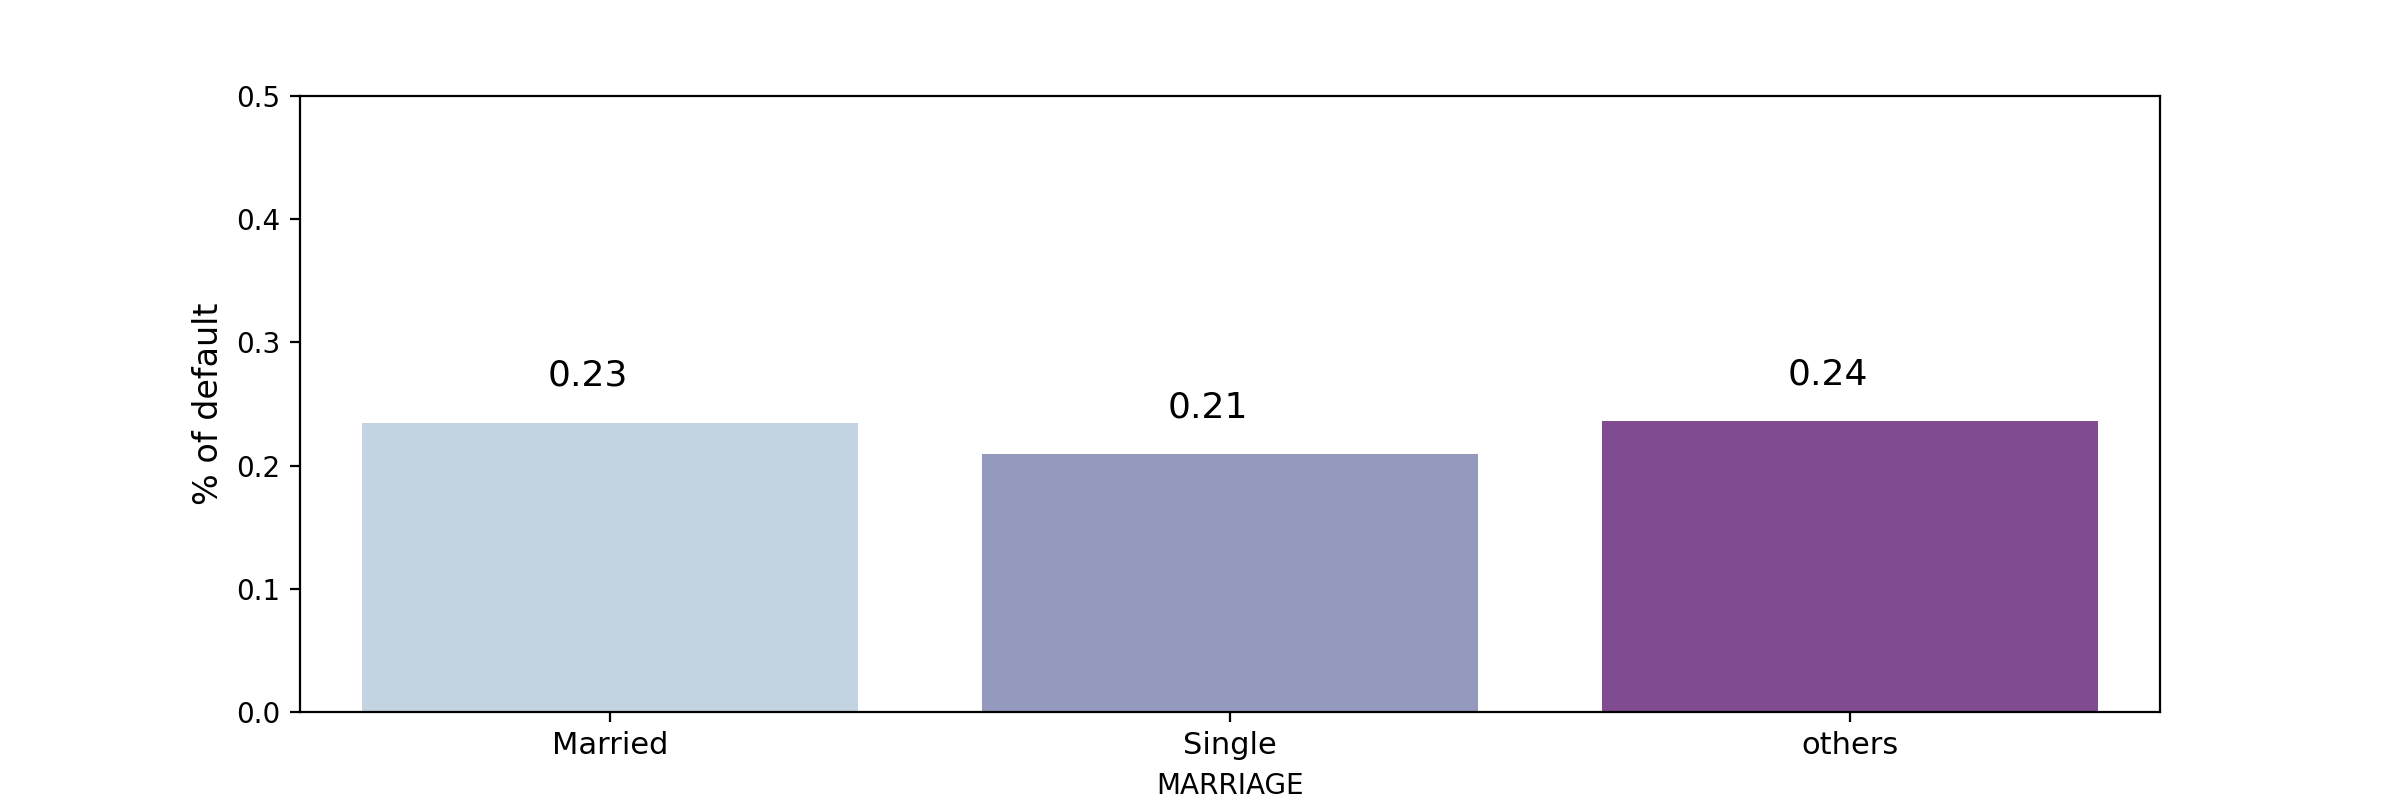

In [270]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = data, palette='BuPu', errorbar=None)

plt.ylabel("% of default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

* We can observe that Single people have lower chances of defaulting than married and other people.

## Insights on Level of Education

<Figure size 1000x500 with 0 Axes>

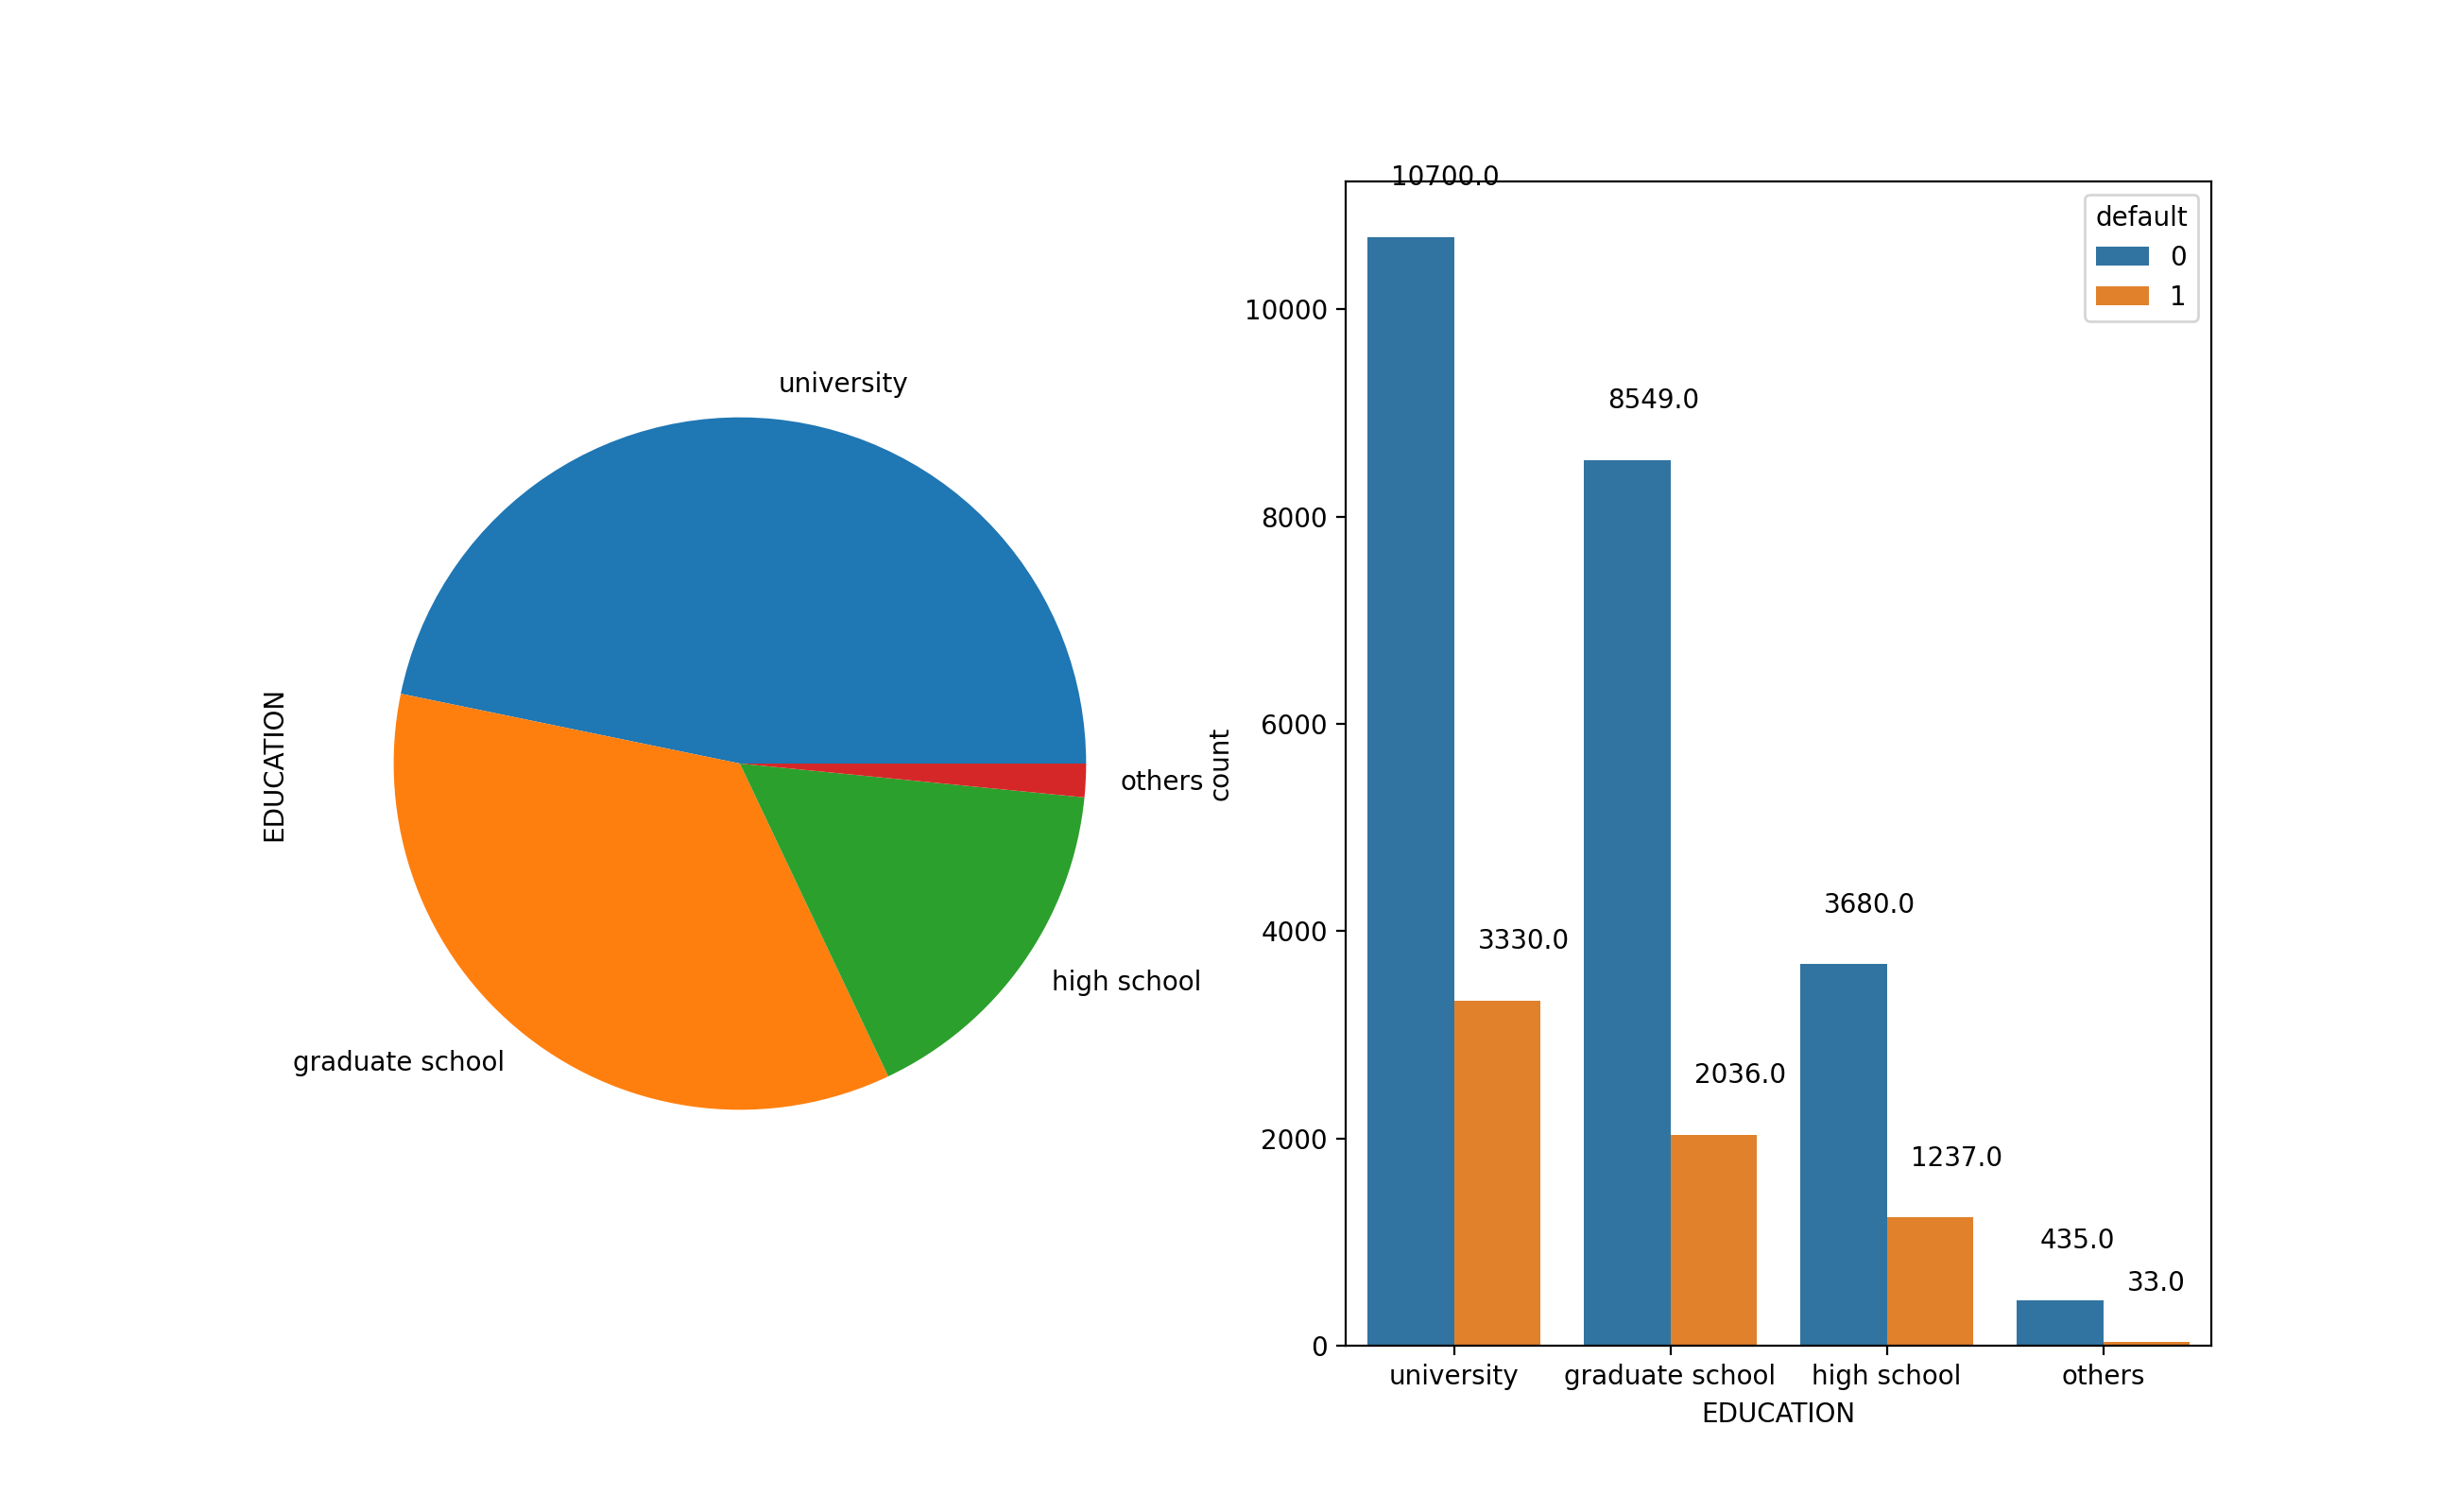

In [271]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
data_dup['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
ax = sns.countplot(x = 'EDUCATION', hue = 'default', data = data_dup)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

* The predominant level of education in our dataset is 'University', followed by 'Grad School' and 'Others'.

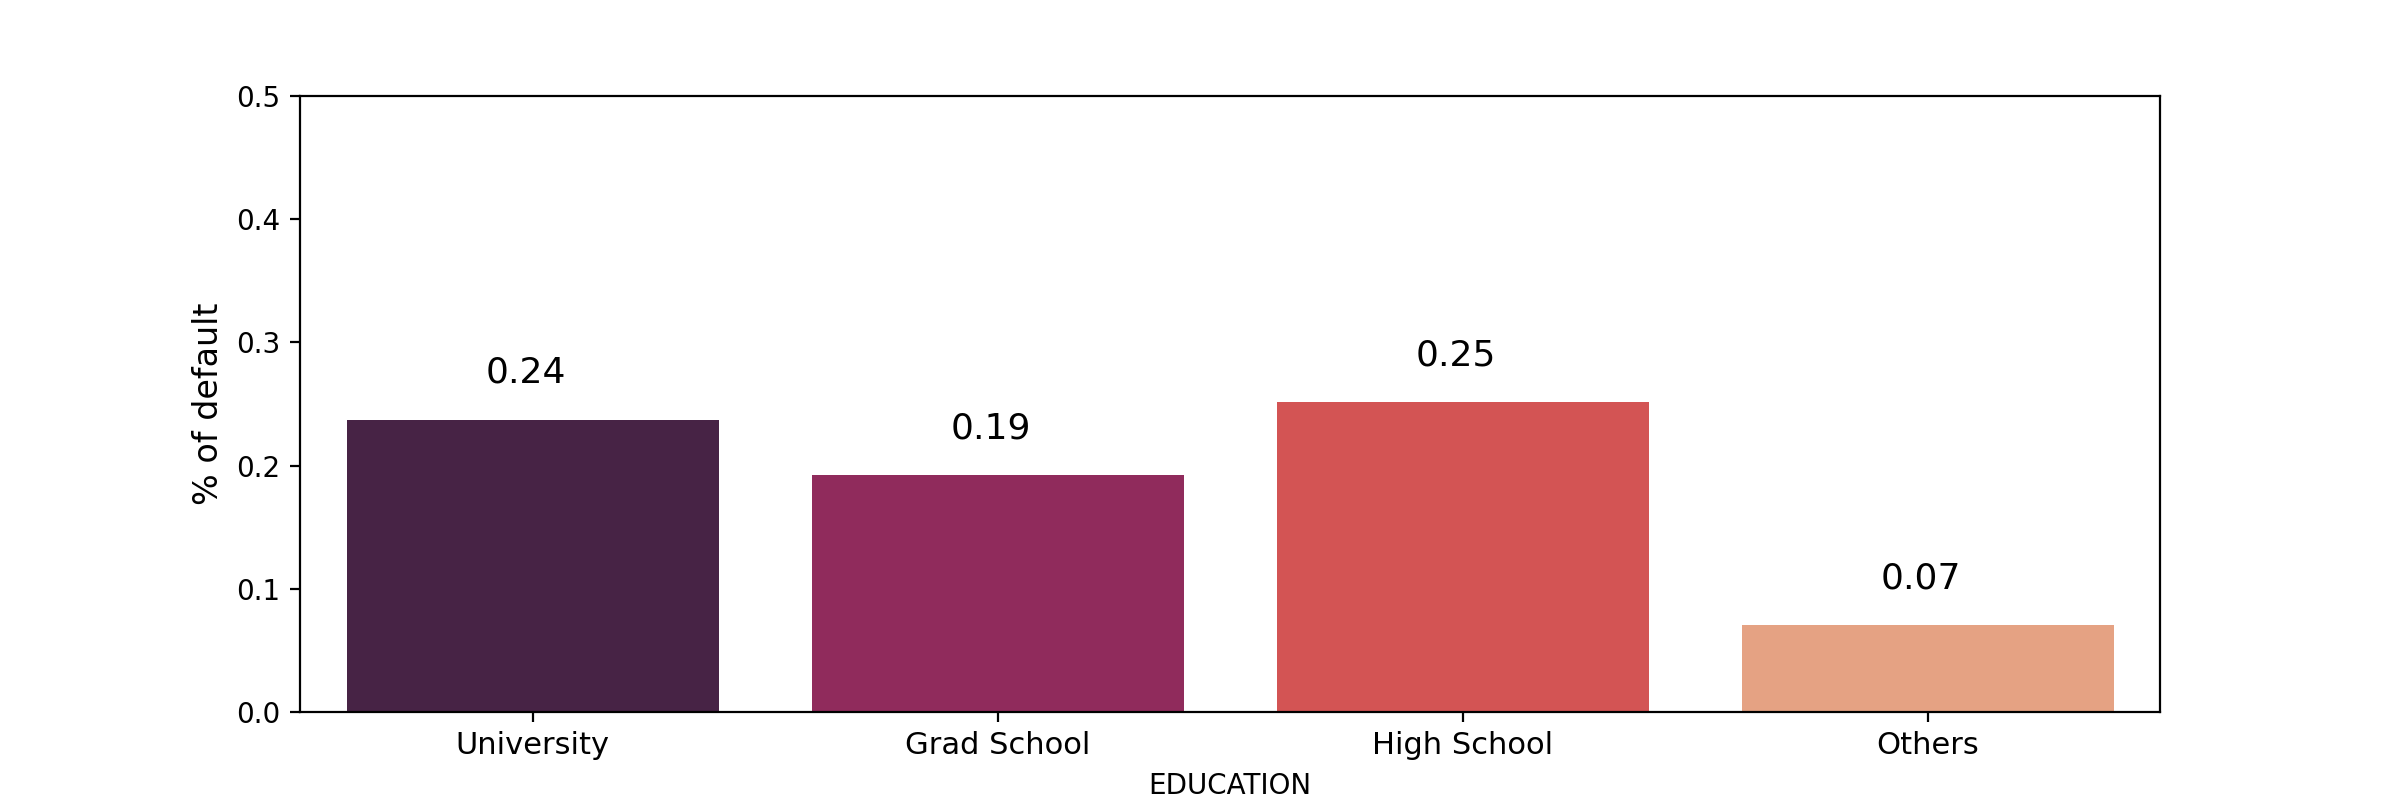

In [272]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "default", data = data, palette = 'rocket', errorbar=None)

plt.ylabel("% of default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['University','Grad School','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

* Considering the level of education, it seems that a higher education translates to a lower chance of default.

## Insights on Credit Limit

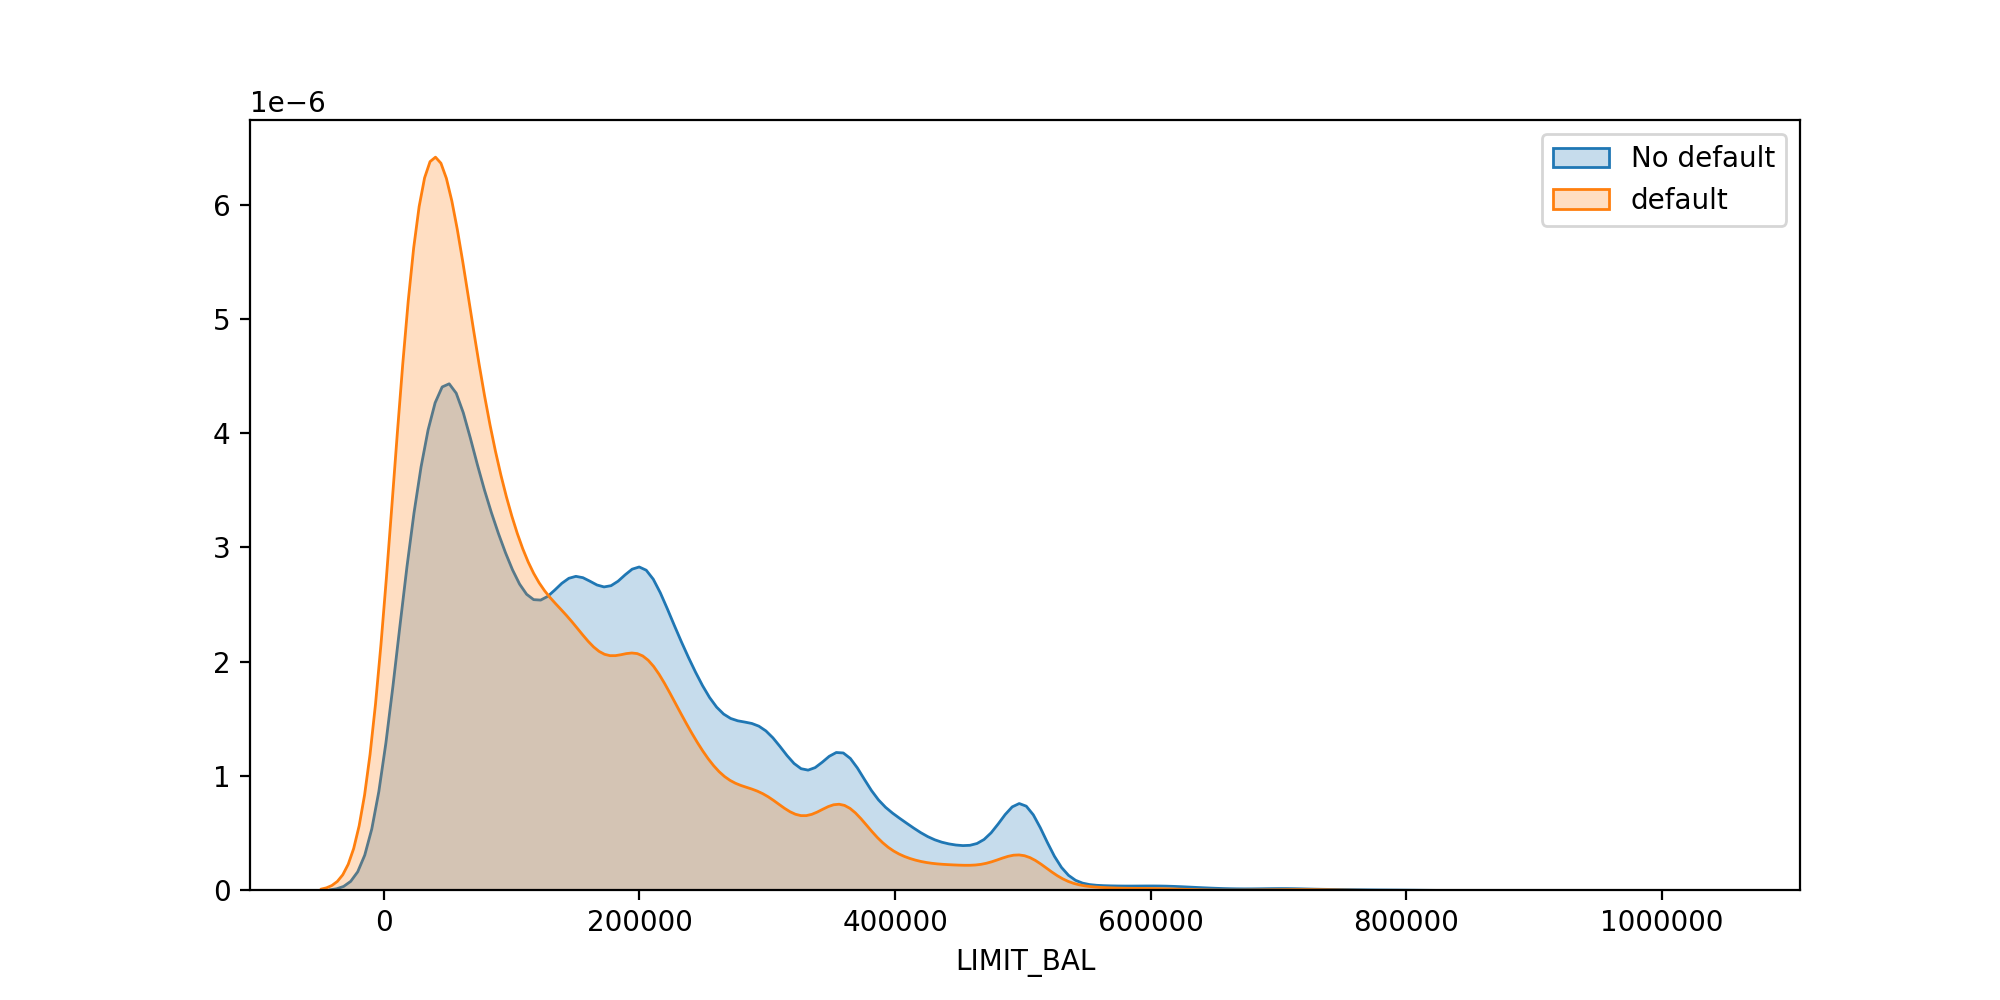

In [273]:
plt.figure(figsize=(10,5))
sns.kdeplot(data.loc[(data['default'] == 0), 'LIMIT_BAL'], label = 'No default', fill = True)
sns.kdeplot(data.loc[(data['default'] == 1), 'LIMIT_BAL'], label = 'default', fill = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

* Most customers have a credit limit of 200k or less. Also it seems that a higher concentration defaulting occurs in the same range.

In [274]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


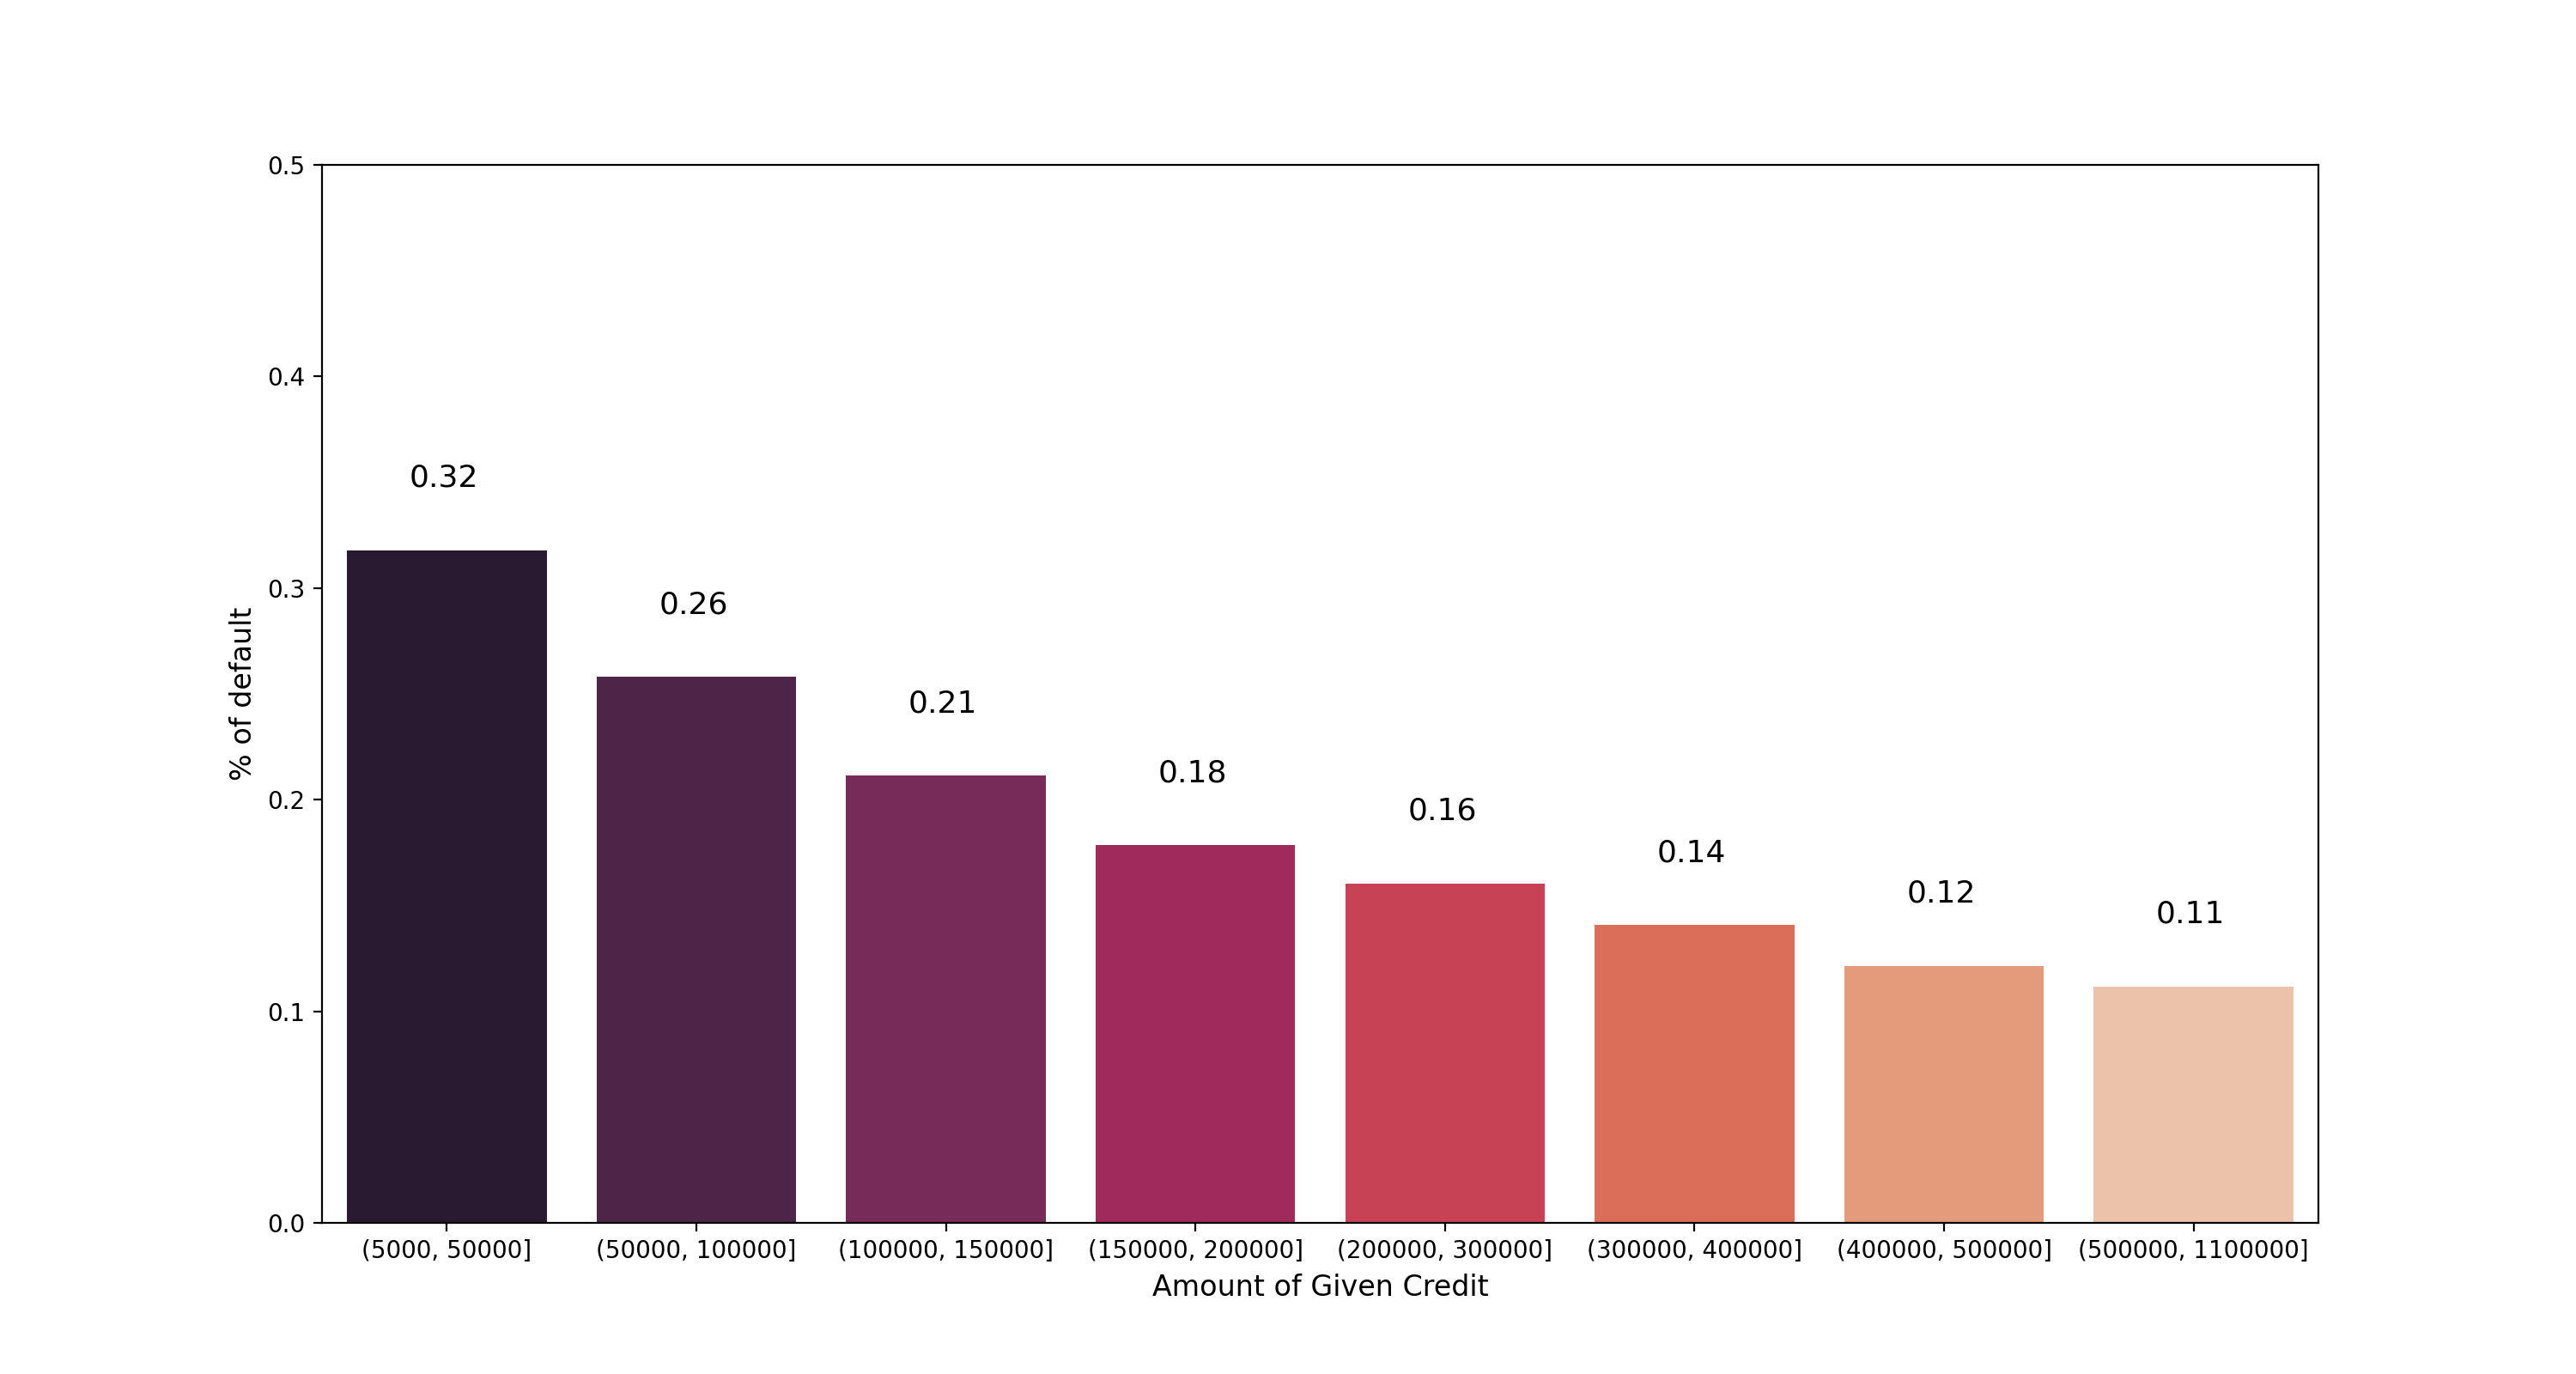

In [275]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x = "LimitBin", y = "default", data = data, palette = 'rocket', errorbar=None)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

* Over 30% of default can be observed with credit limit of 50K or less
* Also, the higher the credit limit, the lower is the chance of defaulting

## Age with Gender

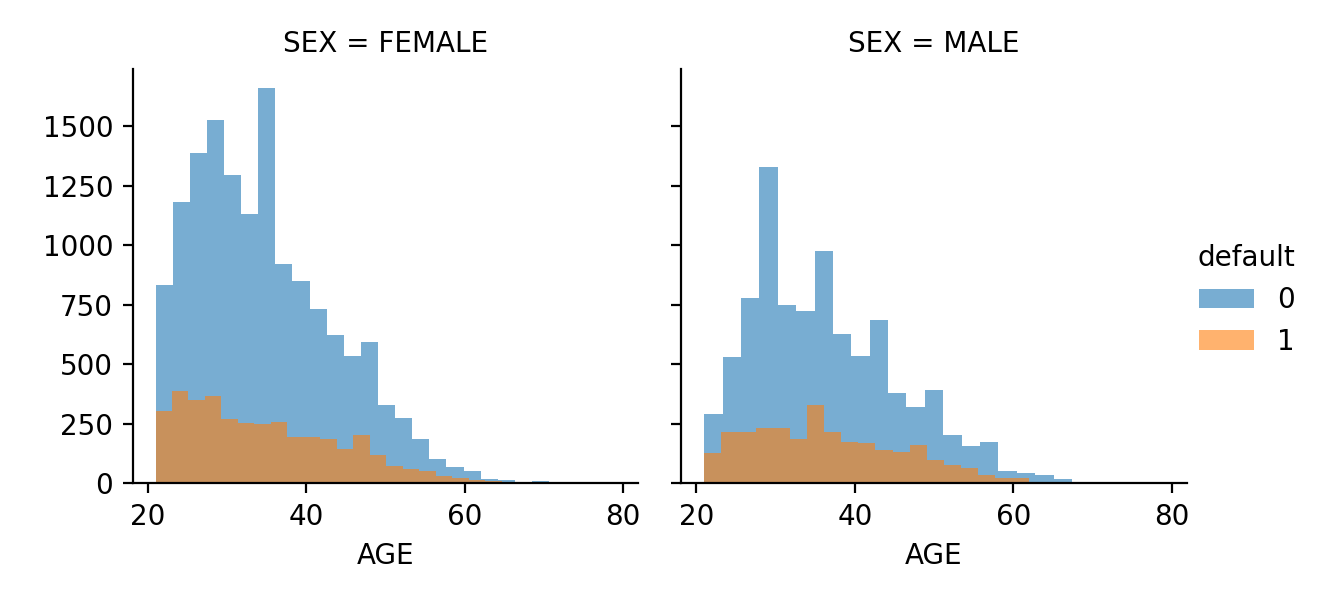

In [276]:
g = sns.FacetGrid(data, col='SEX', hue='default')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

* Young Women are more likey to default whereas Men with middle age group are more likely to default

## Insights on Repayment Status

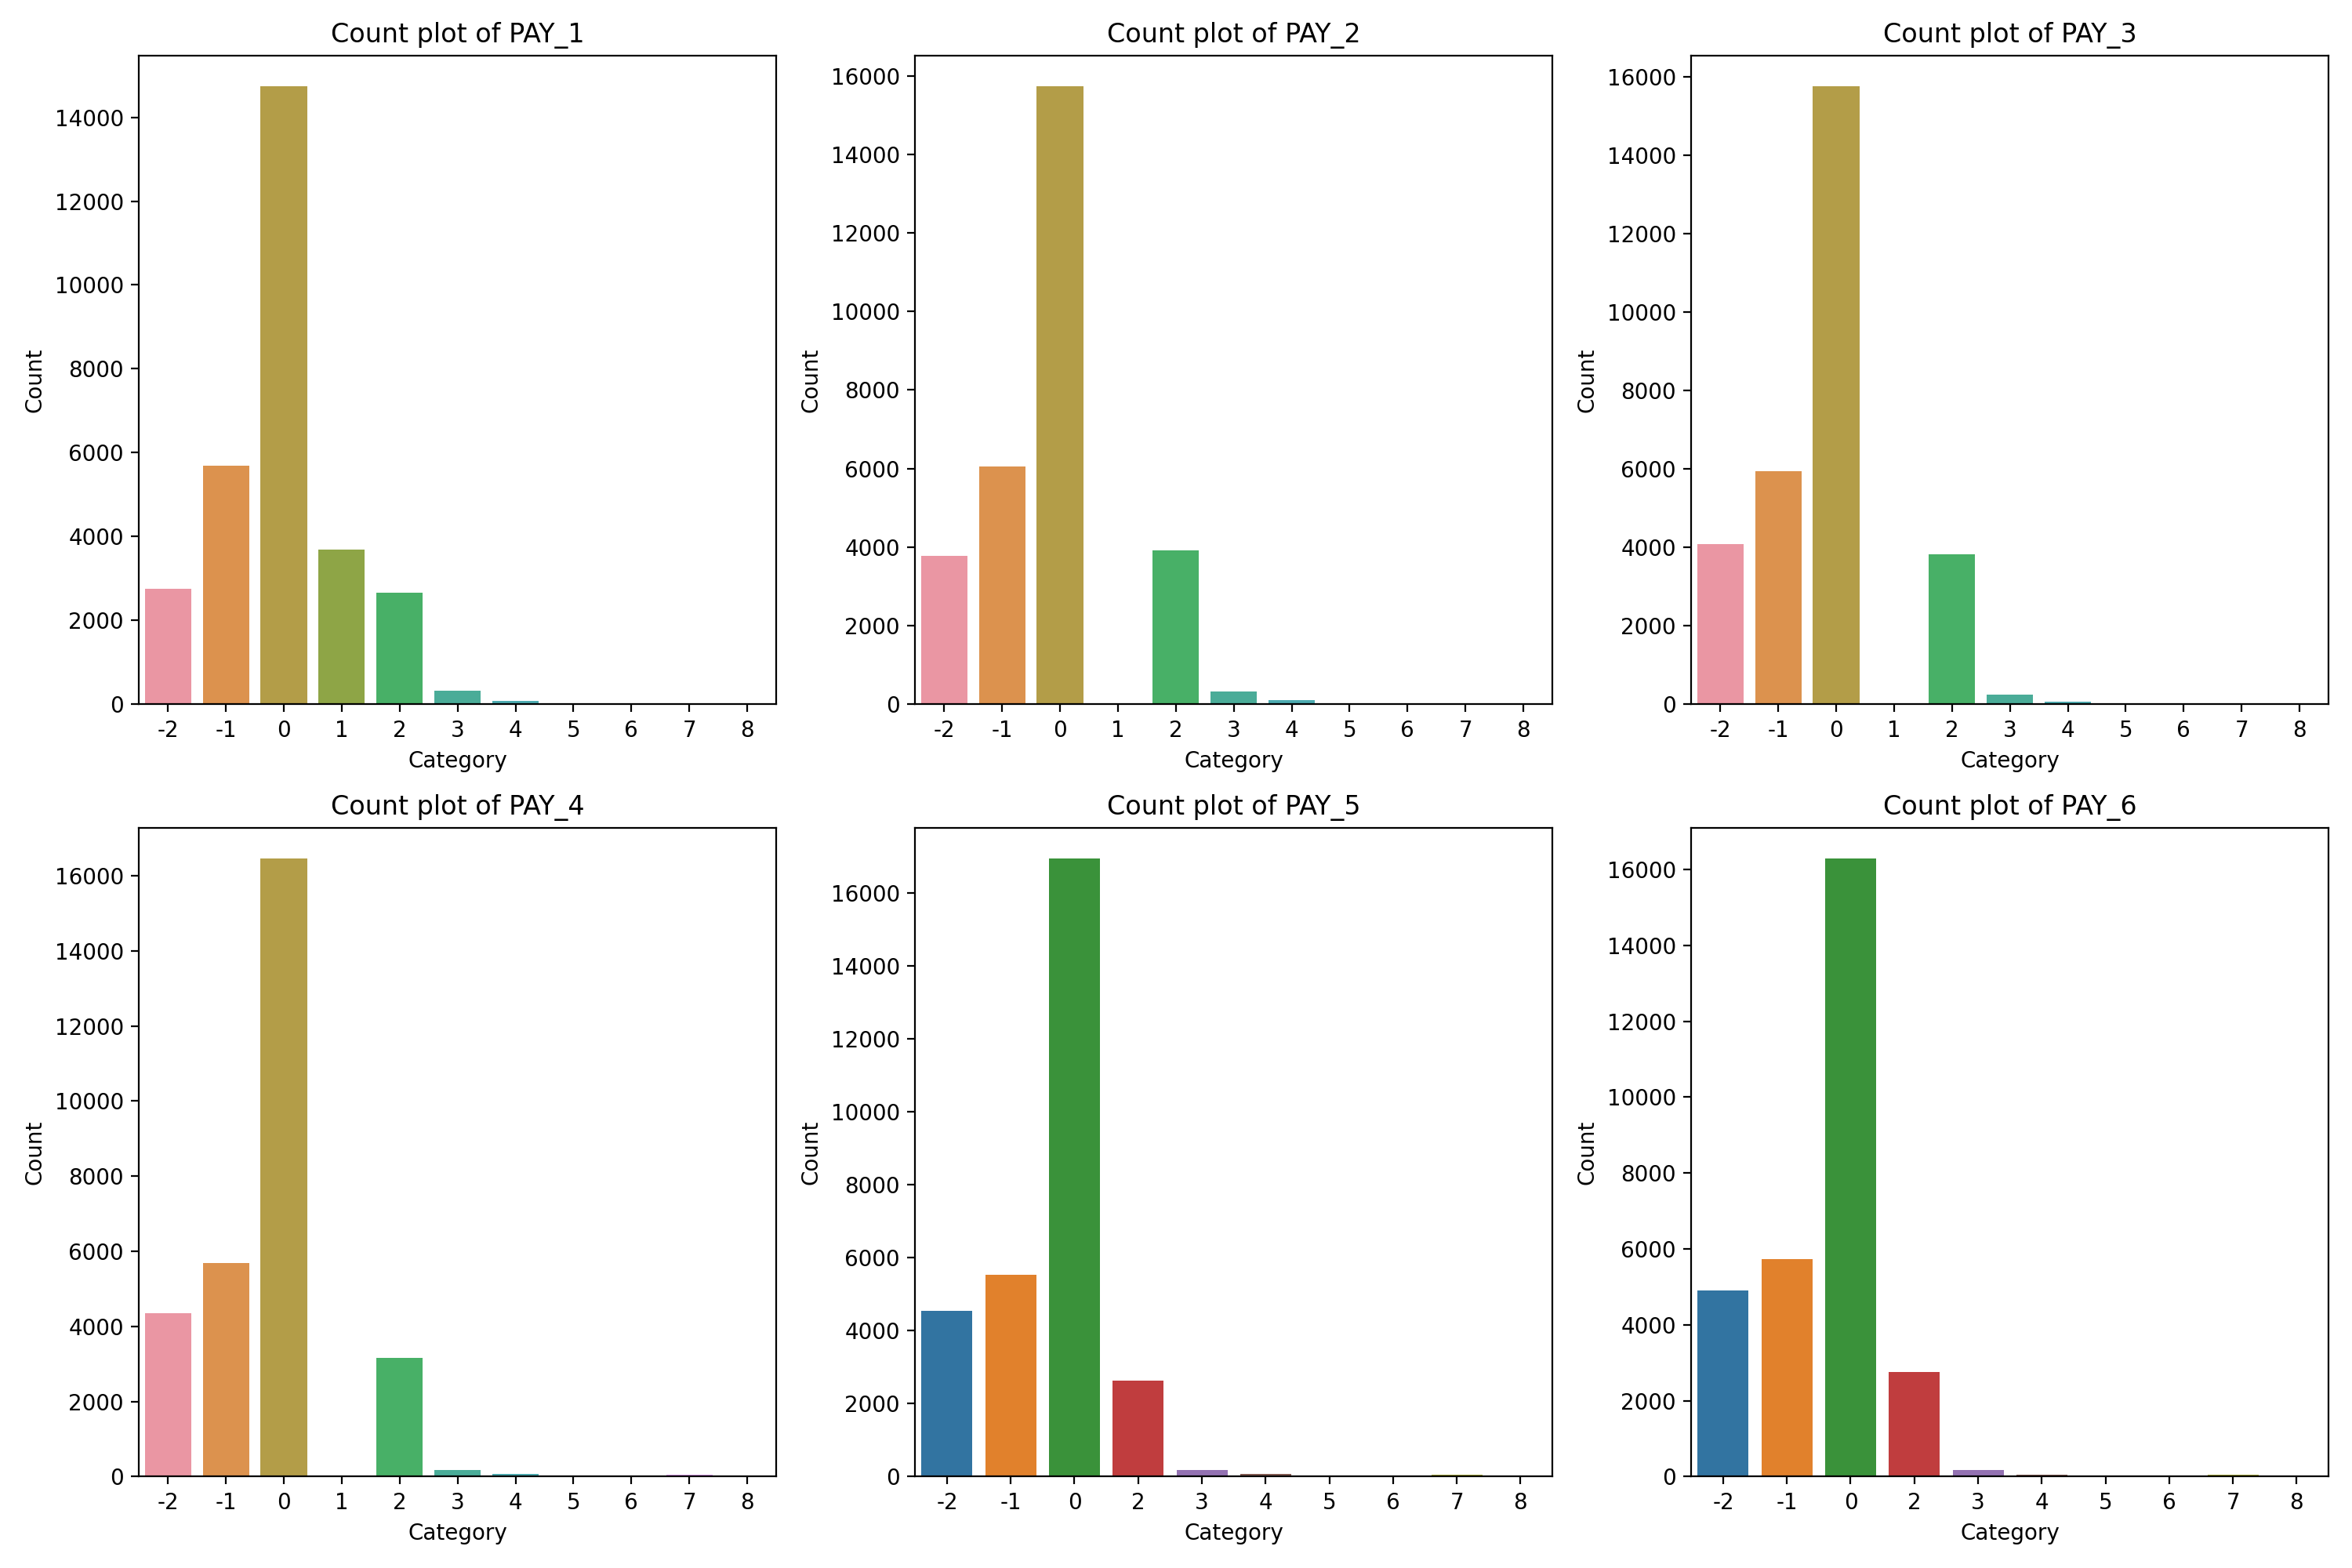

In [277]:
pay_columns = [f'PAY_{i}' for i in range(1, 7)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plotting count plots for each column
for i, column in enumerate(pay_columns):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Count plot of {column}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

* Most of the customers are either doing revolving utilization or duly paying their credit card bills.

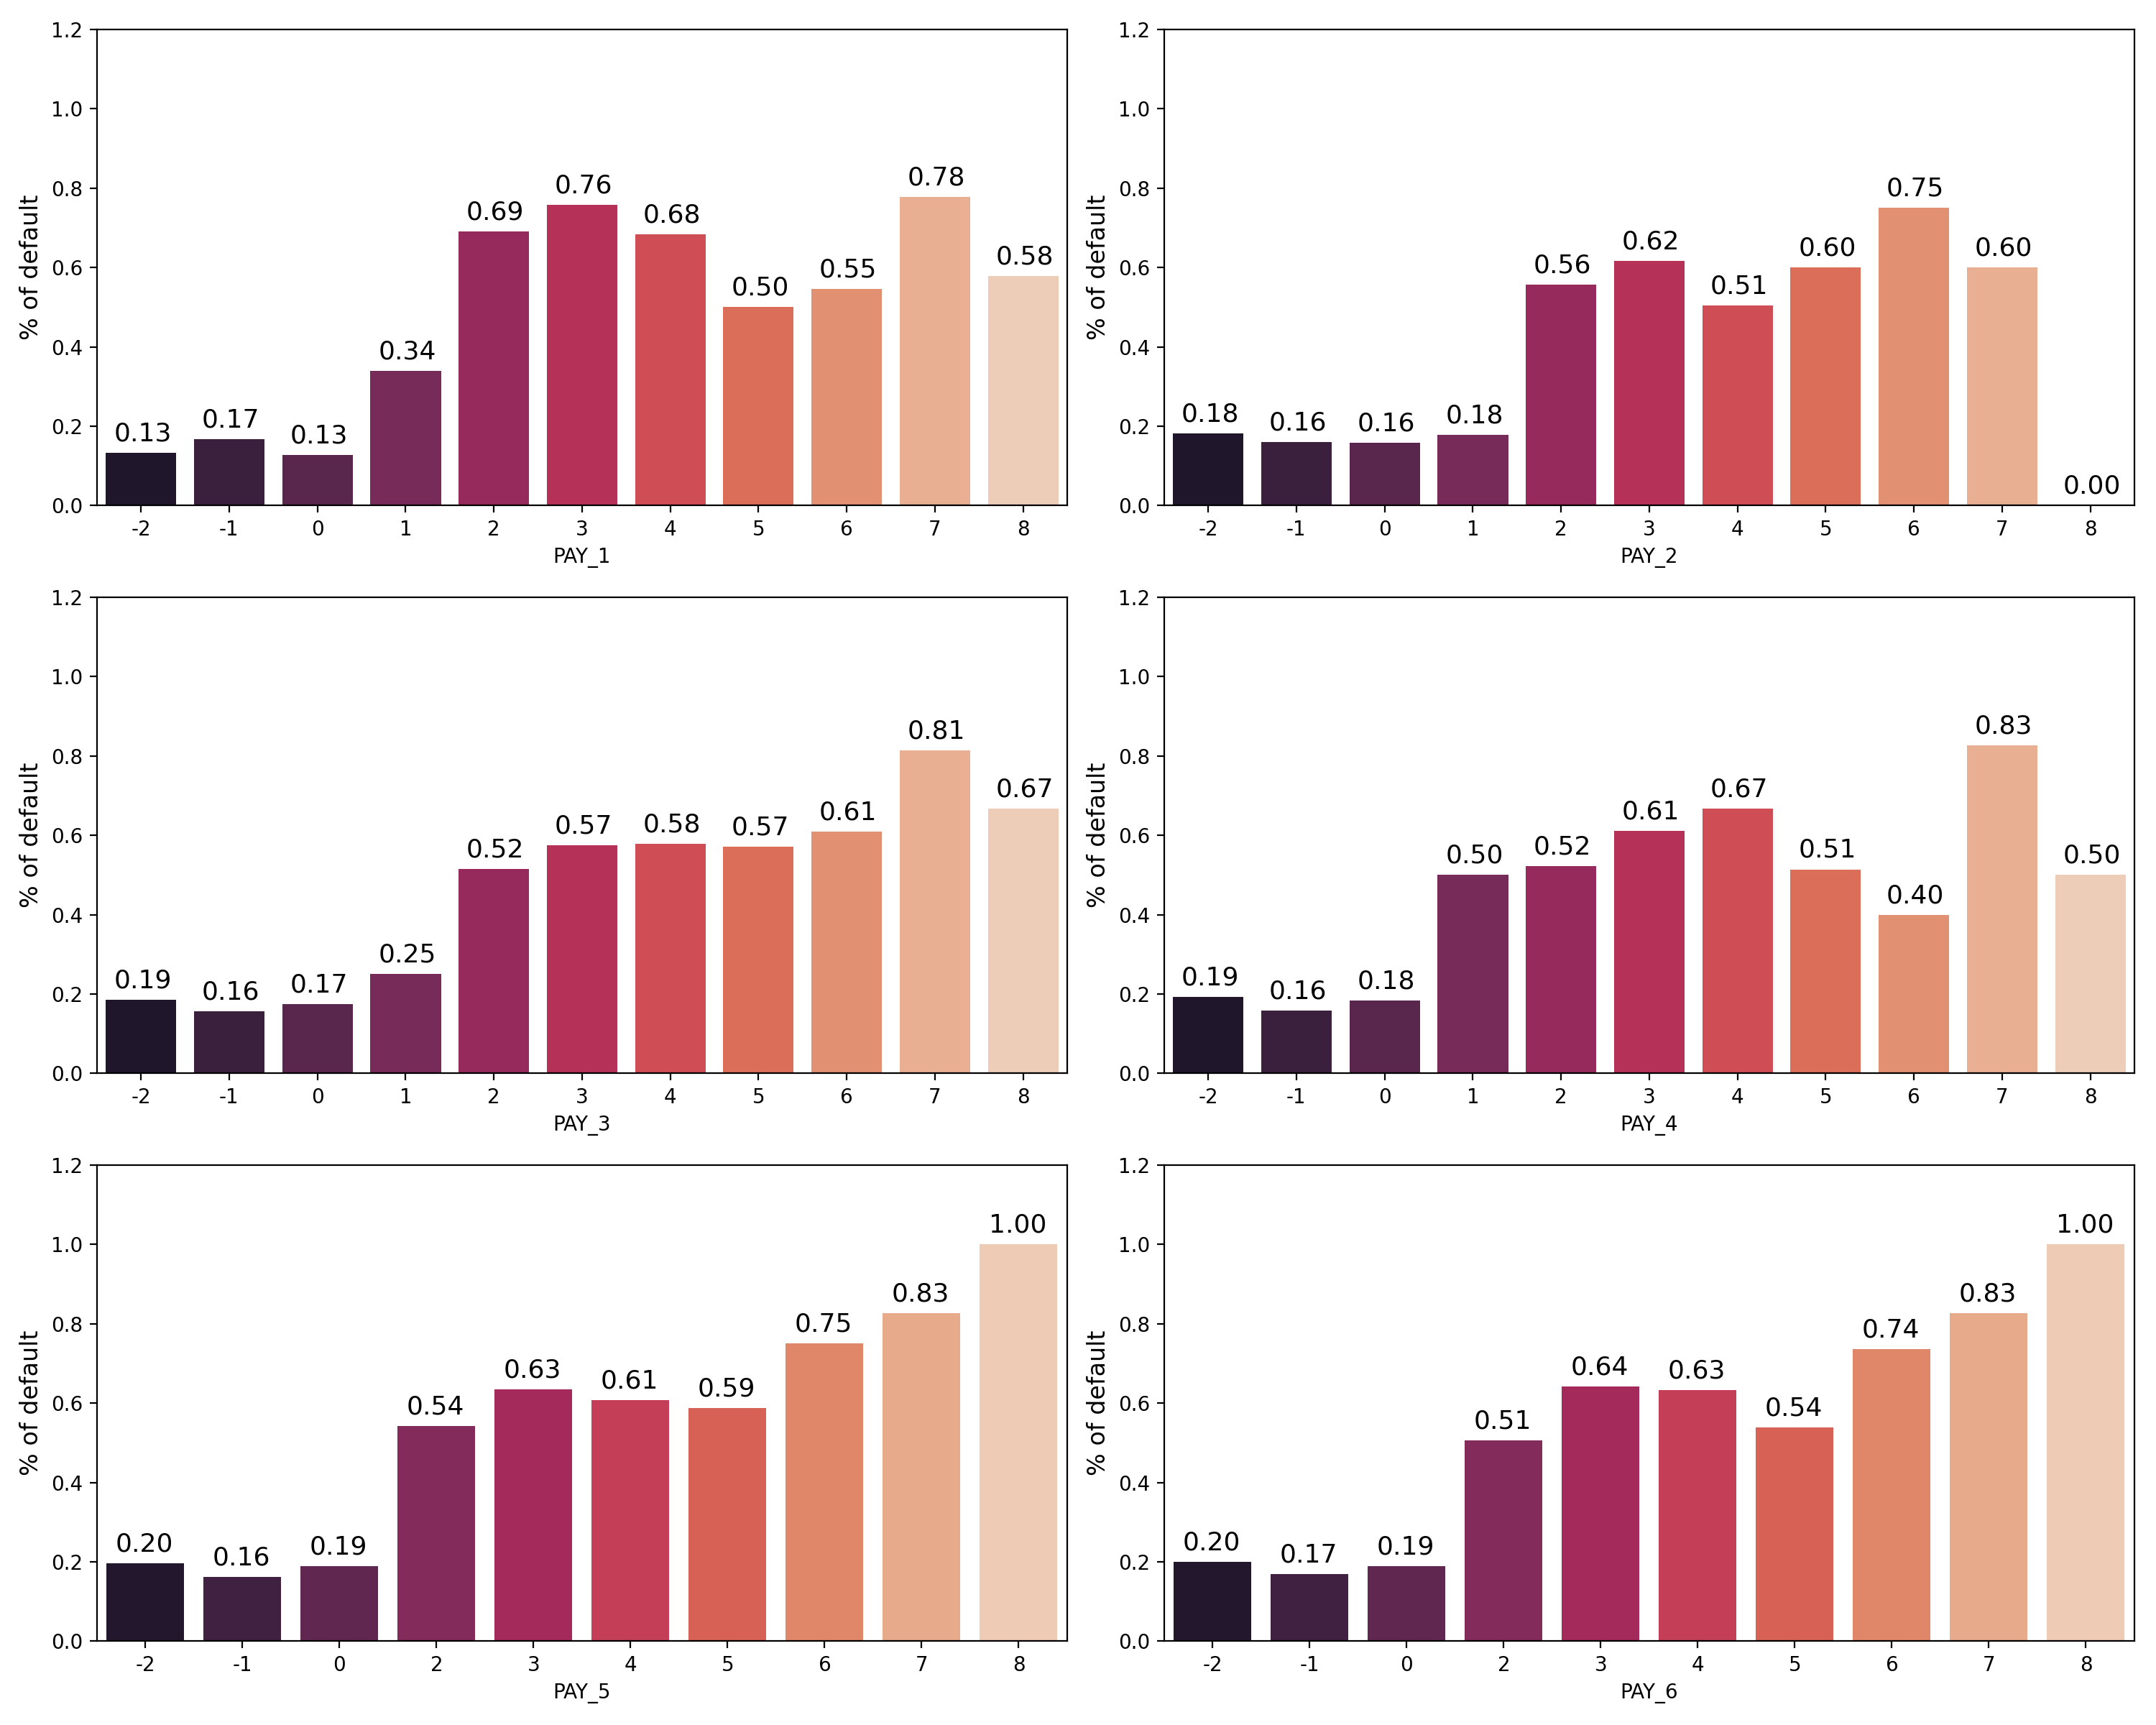

In [278]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15,12))
for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', errorbar=None)
    plt.ylabel("% of default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

* It is observed that the likelihood of default are much lower for the people who duly paid or paying minimum due each month rather than the people who tend to delay their payment over months.

## Bill Statement and Previous Payment

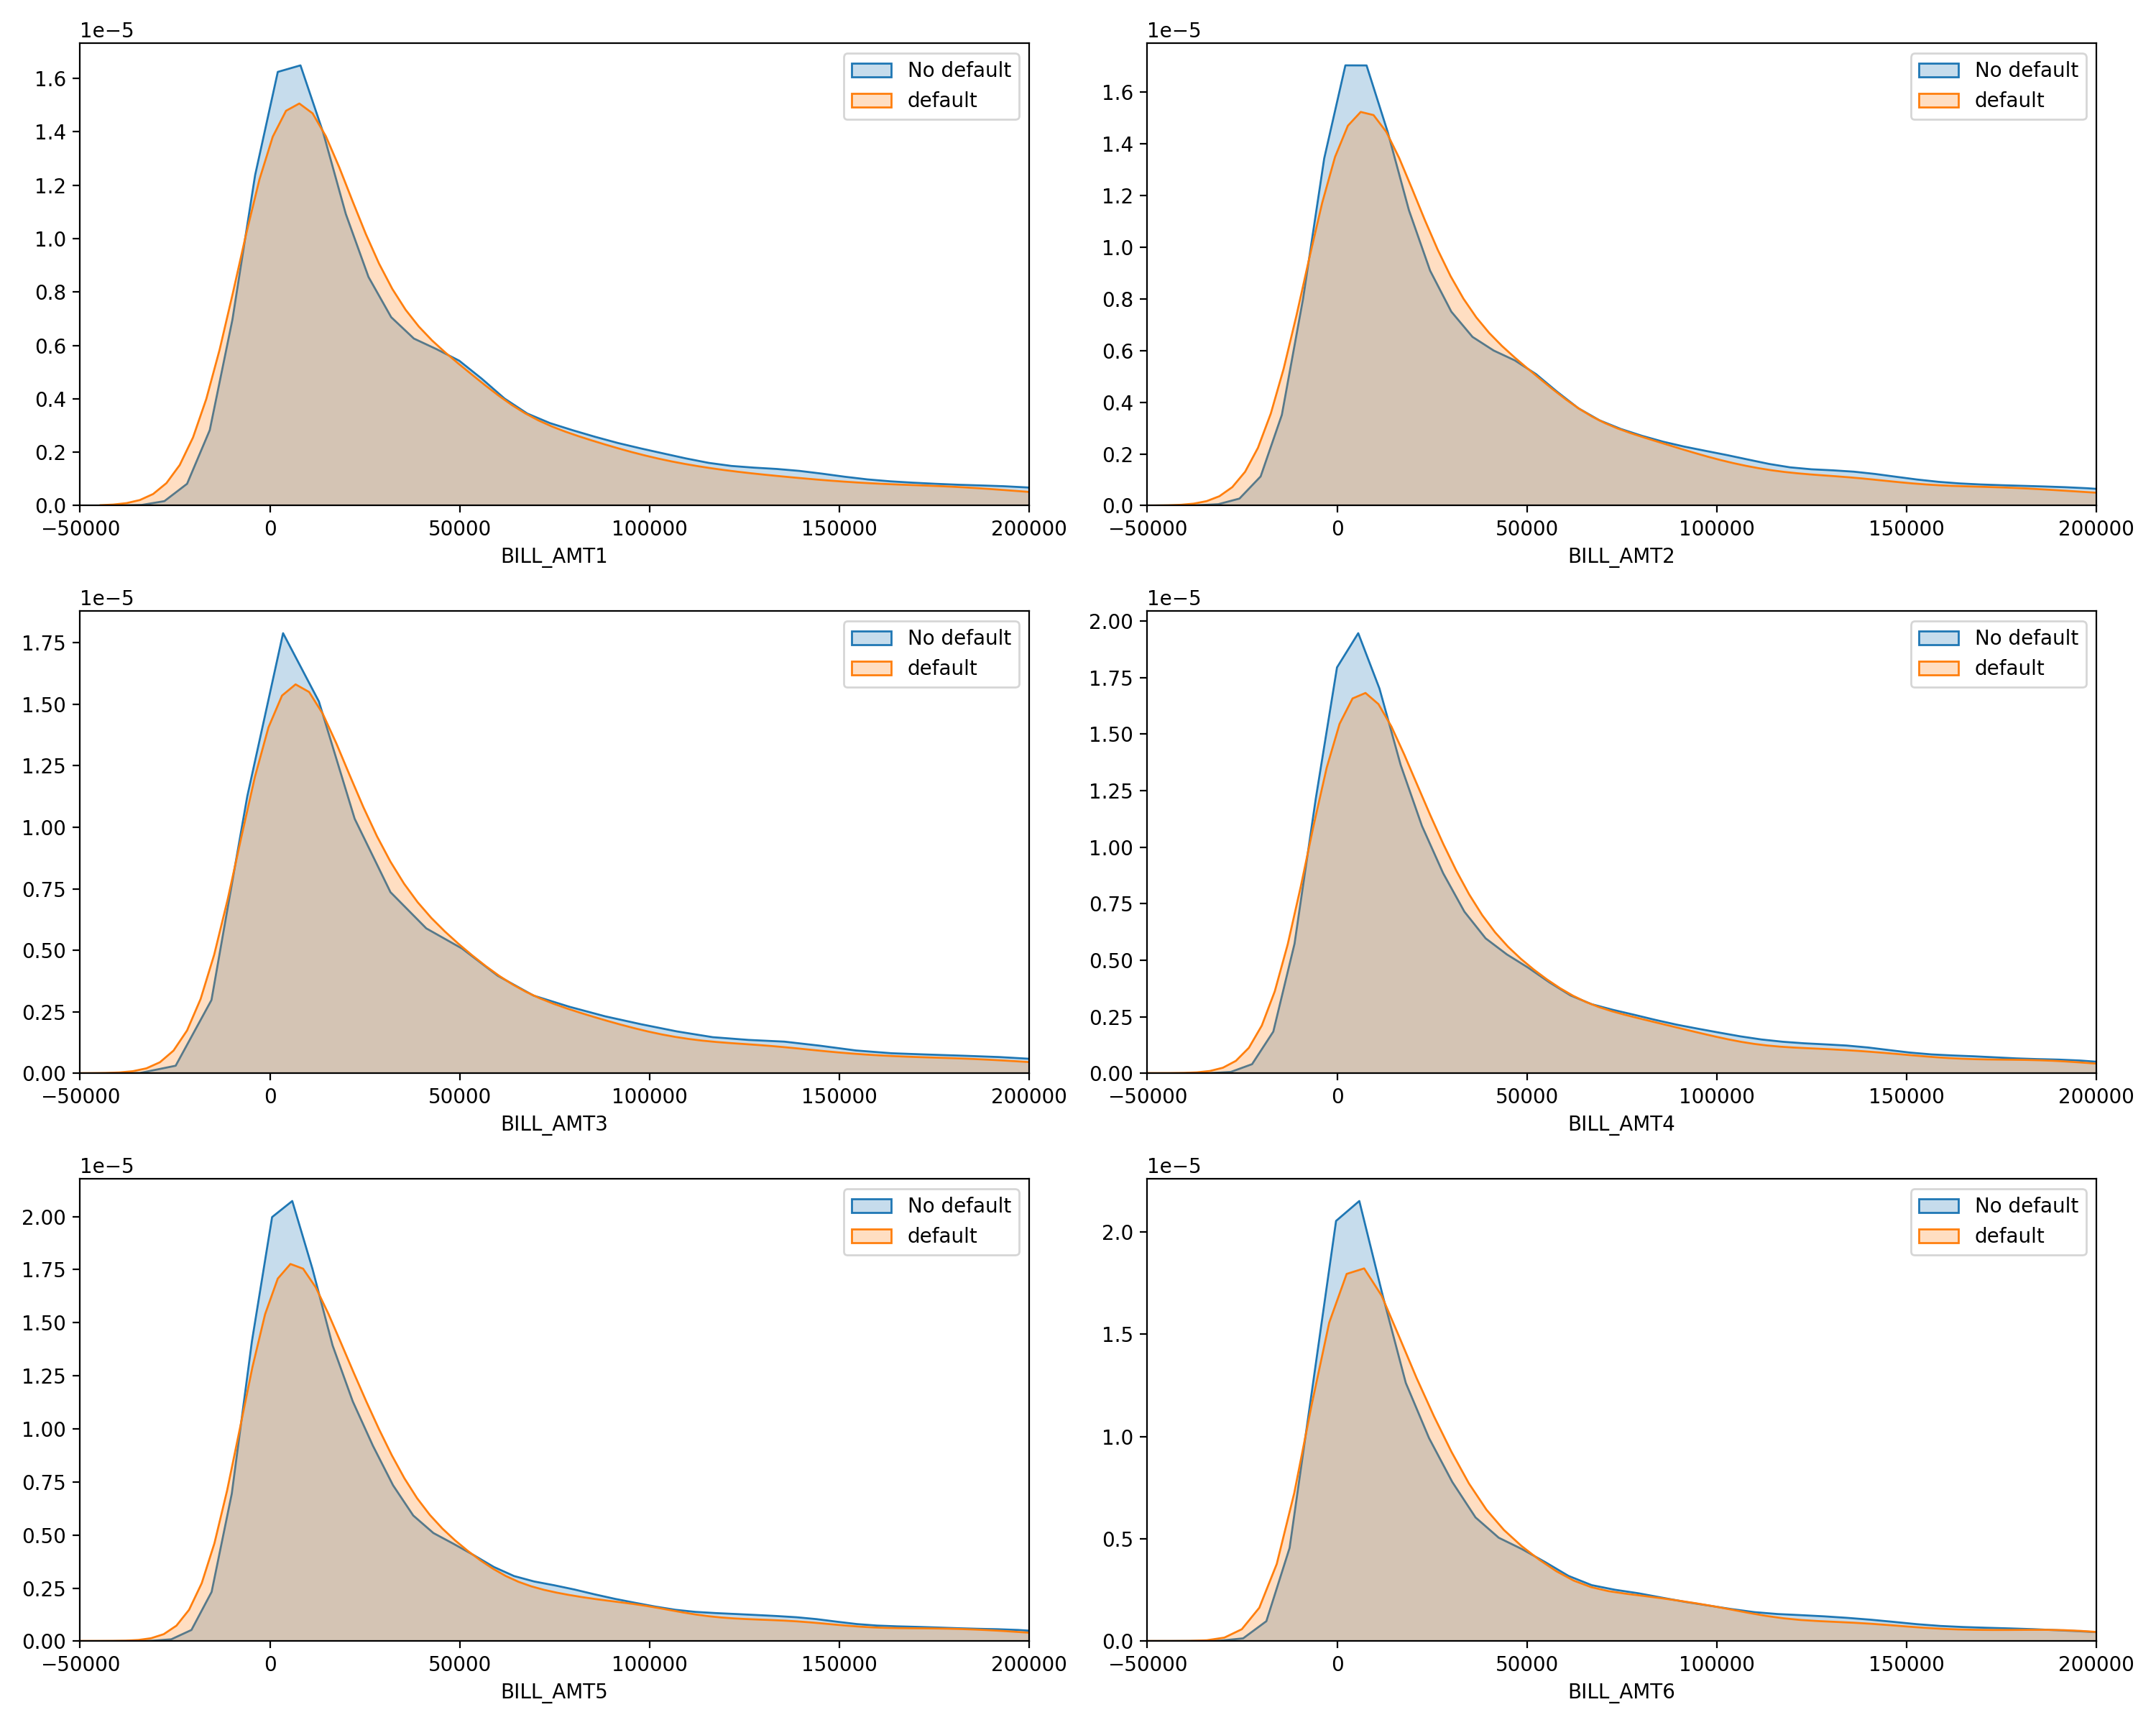

In [279]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['default'] == 0), col], label = 'No default', fill = True)
    sns.kdeplot(data.loc[(data['default'] == 1), col], label = 'default', fill = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [280]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [281]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    data[col] = pd.cut(data[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])

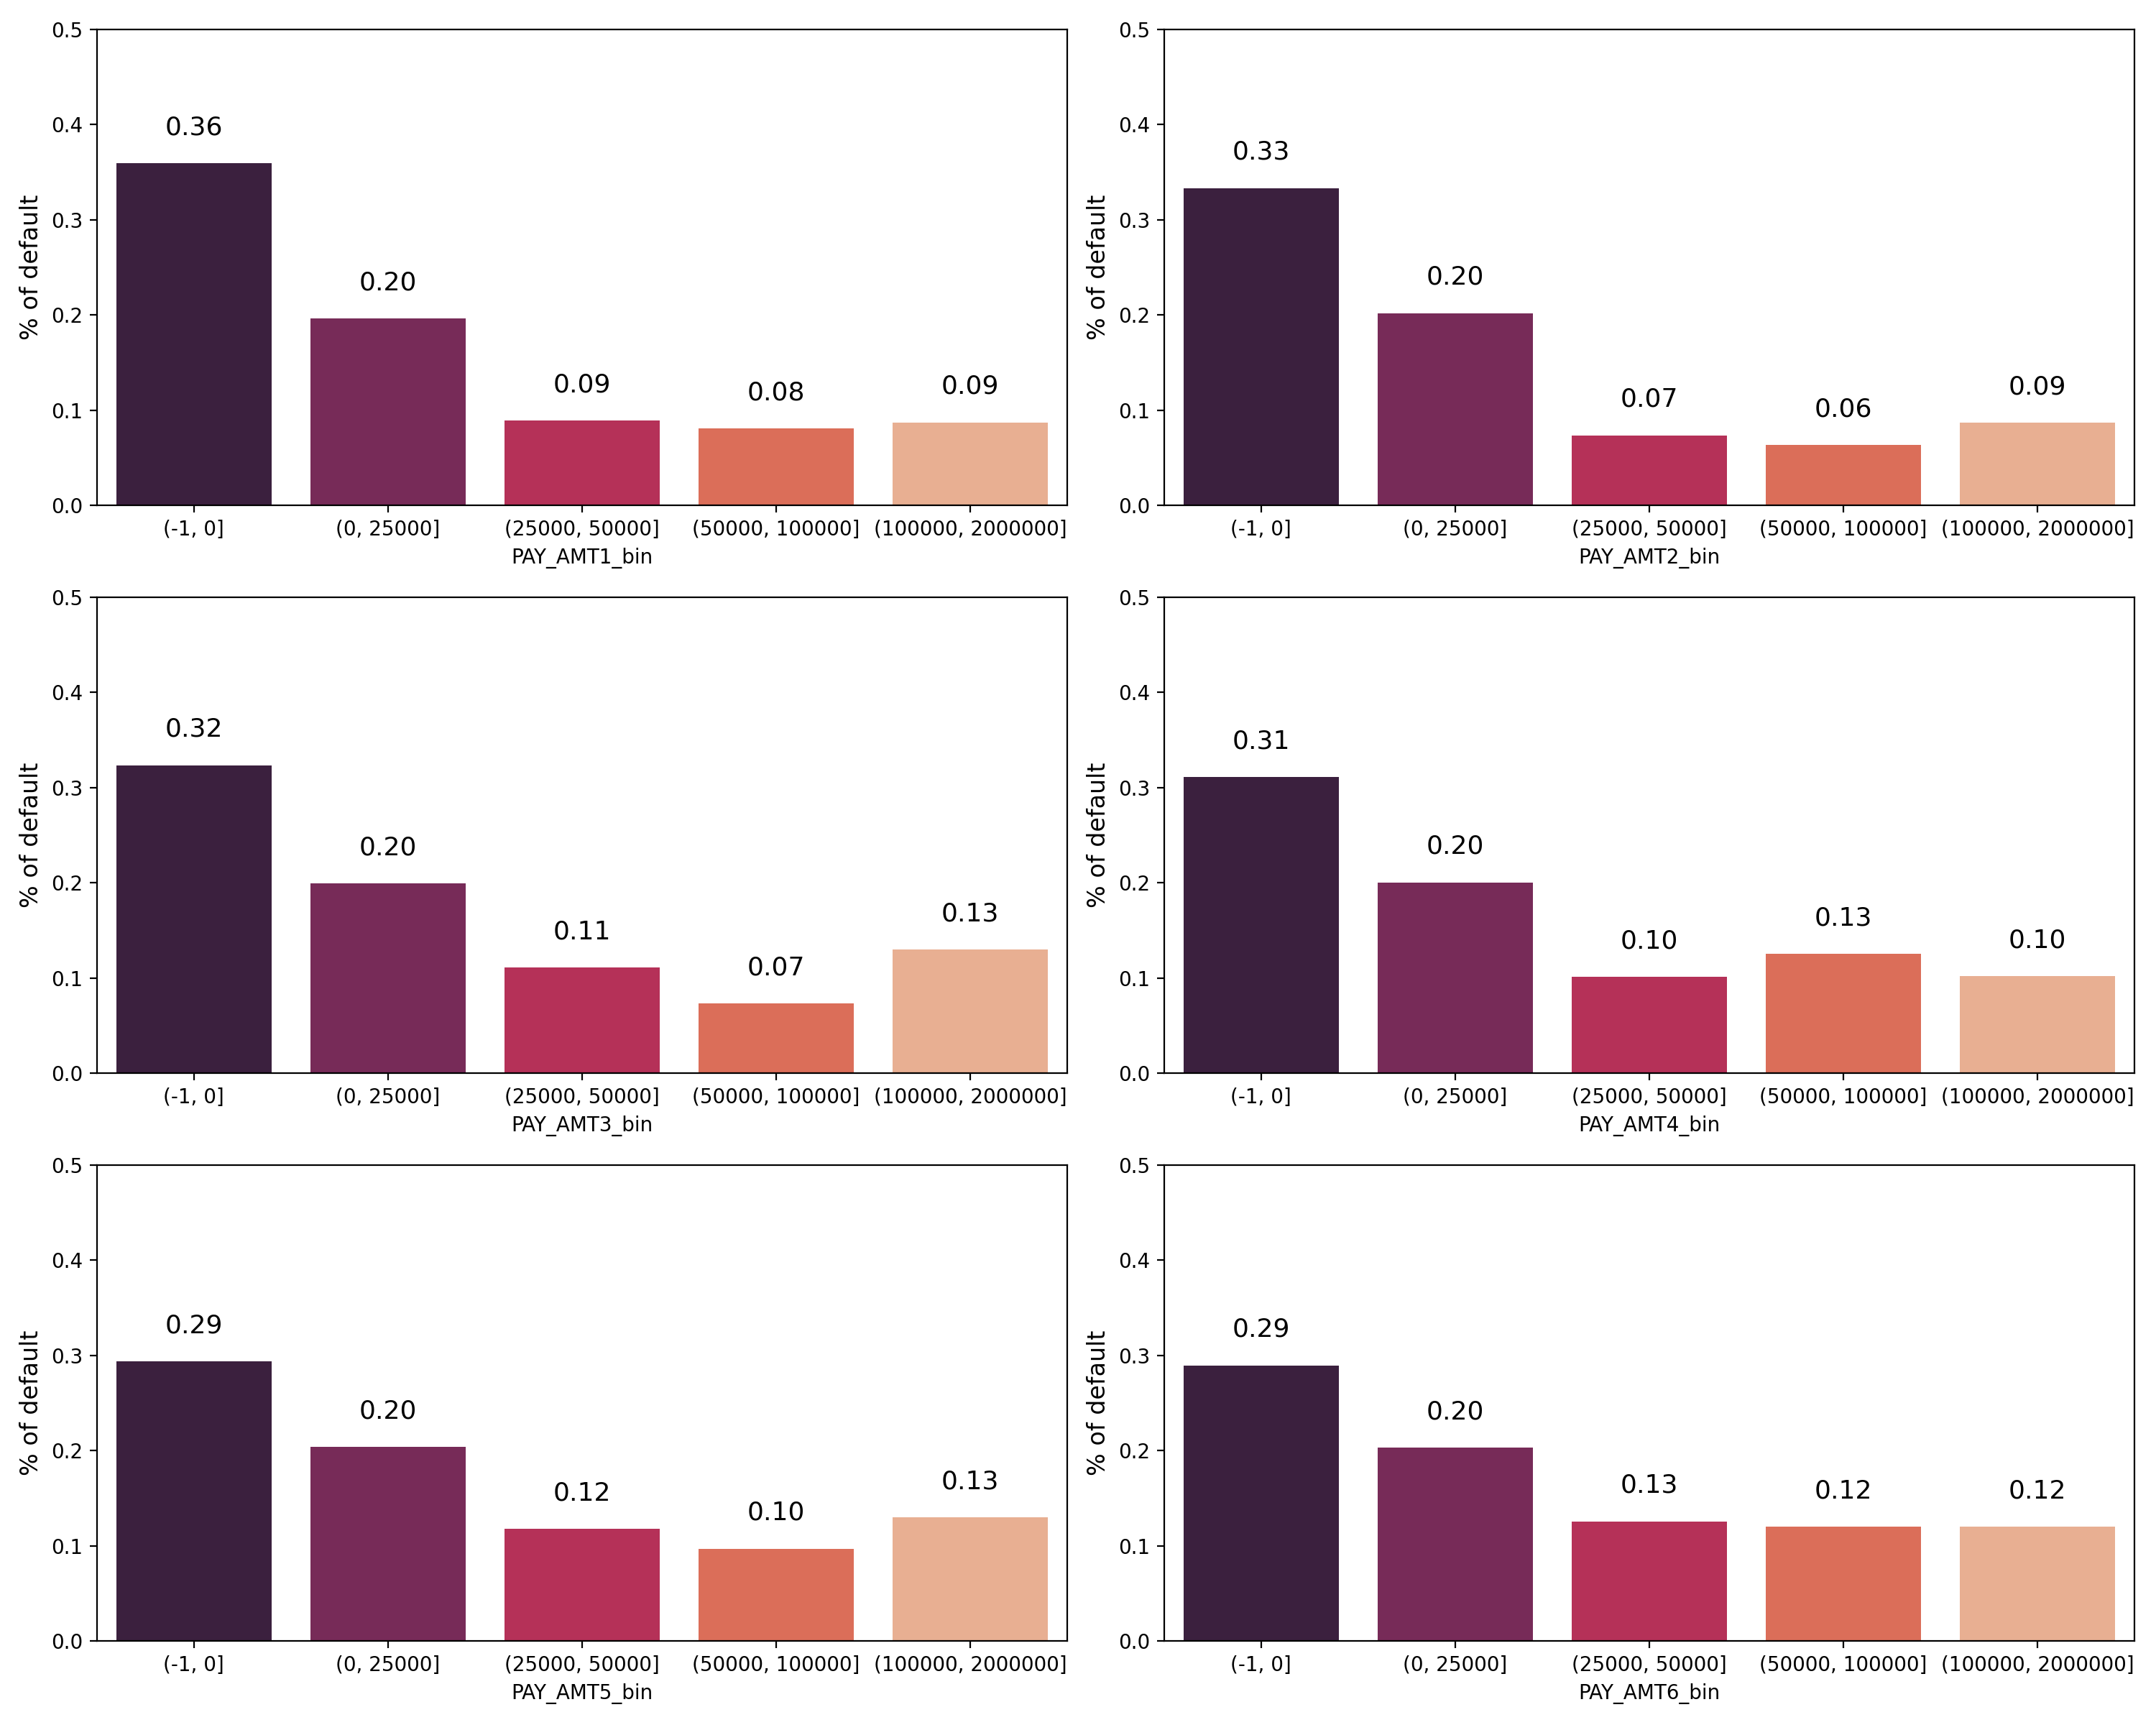

In [282]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', errorbar=None)
    plt.ylabel("% of default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

* There is a higher default rate among those who paid nothing in previous months and a lower default rate among those who have done payment over 25K.

/var/folders/nk/xy4cxgl14yv2l68kd9r8hb240000gn/T/ipykernel_53958/1789062357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


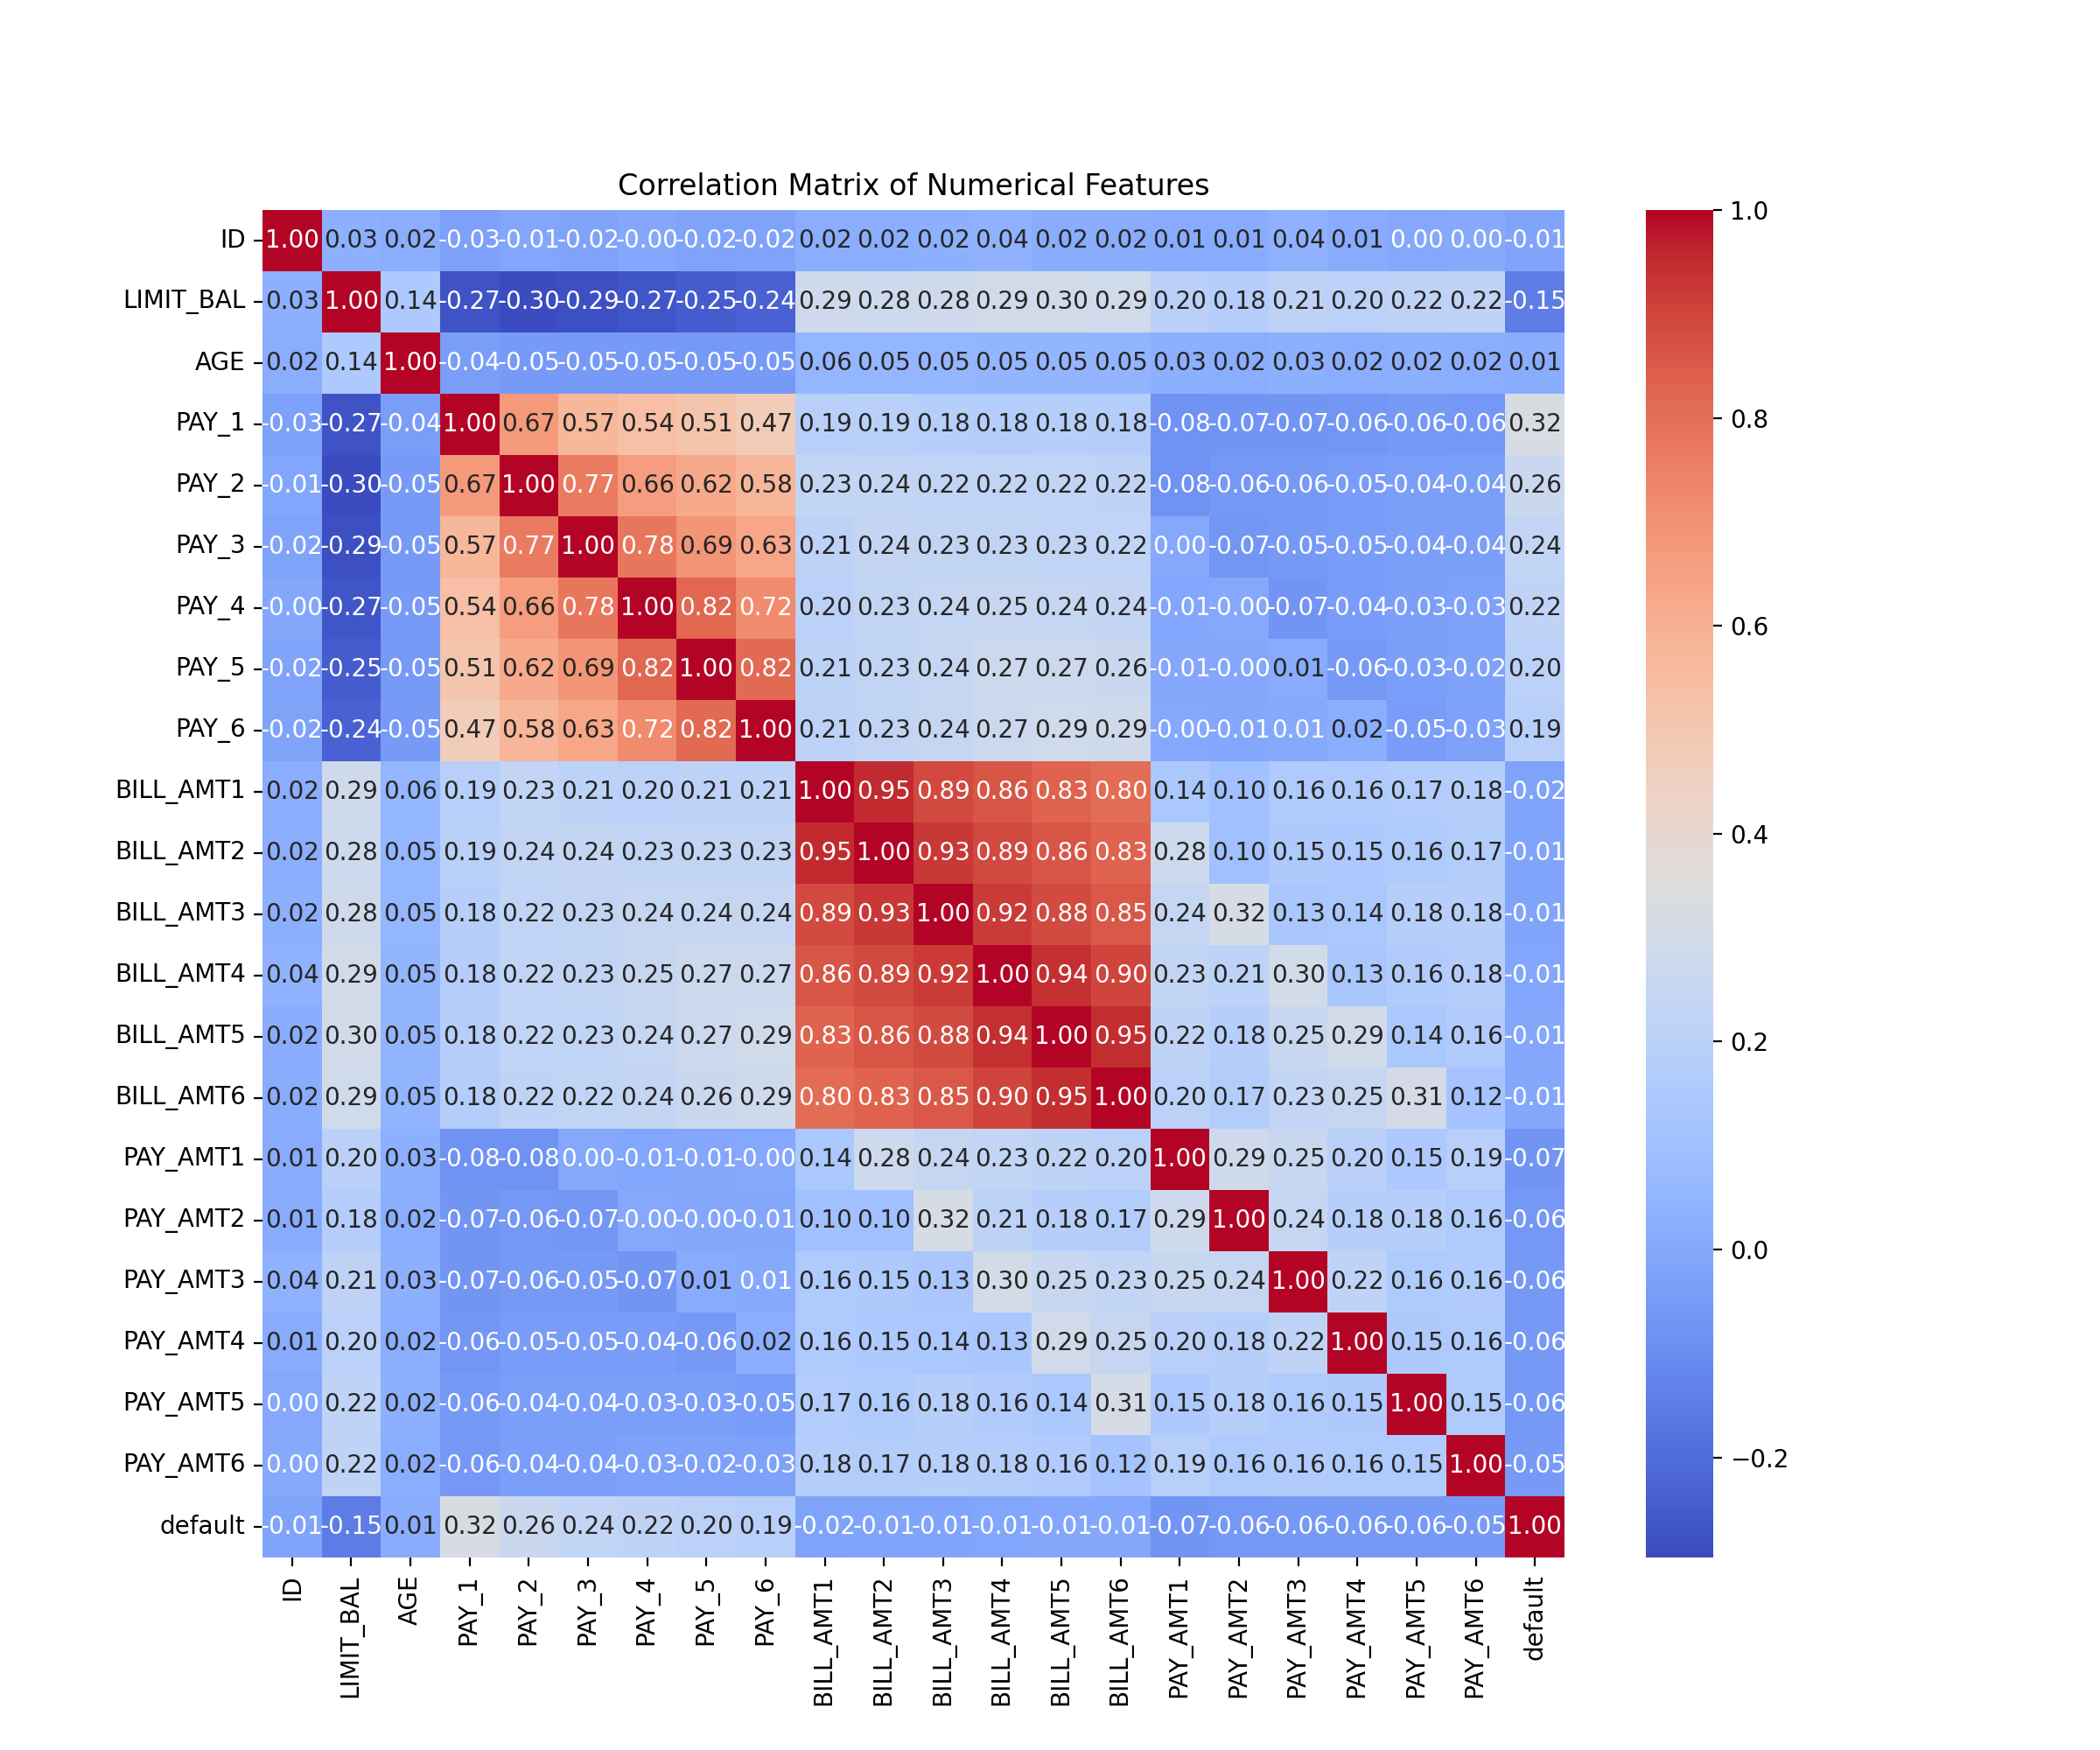

In [286]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [303]:
X = data_ml.copy().drop('default', axis=1)
X = X.drop('ID', axis =1)
y = data_ml['default']

In [304]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


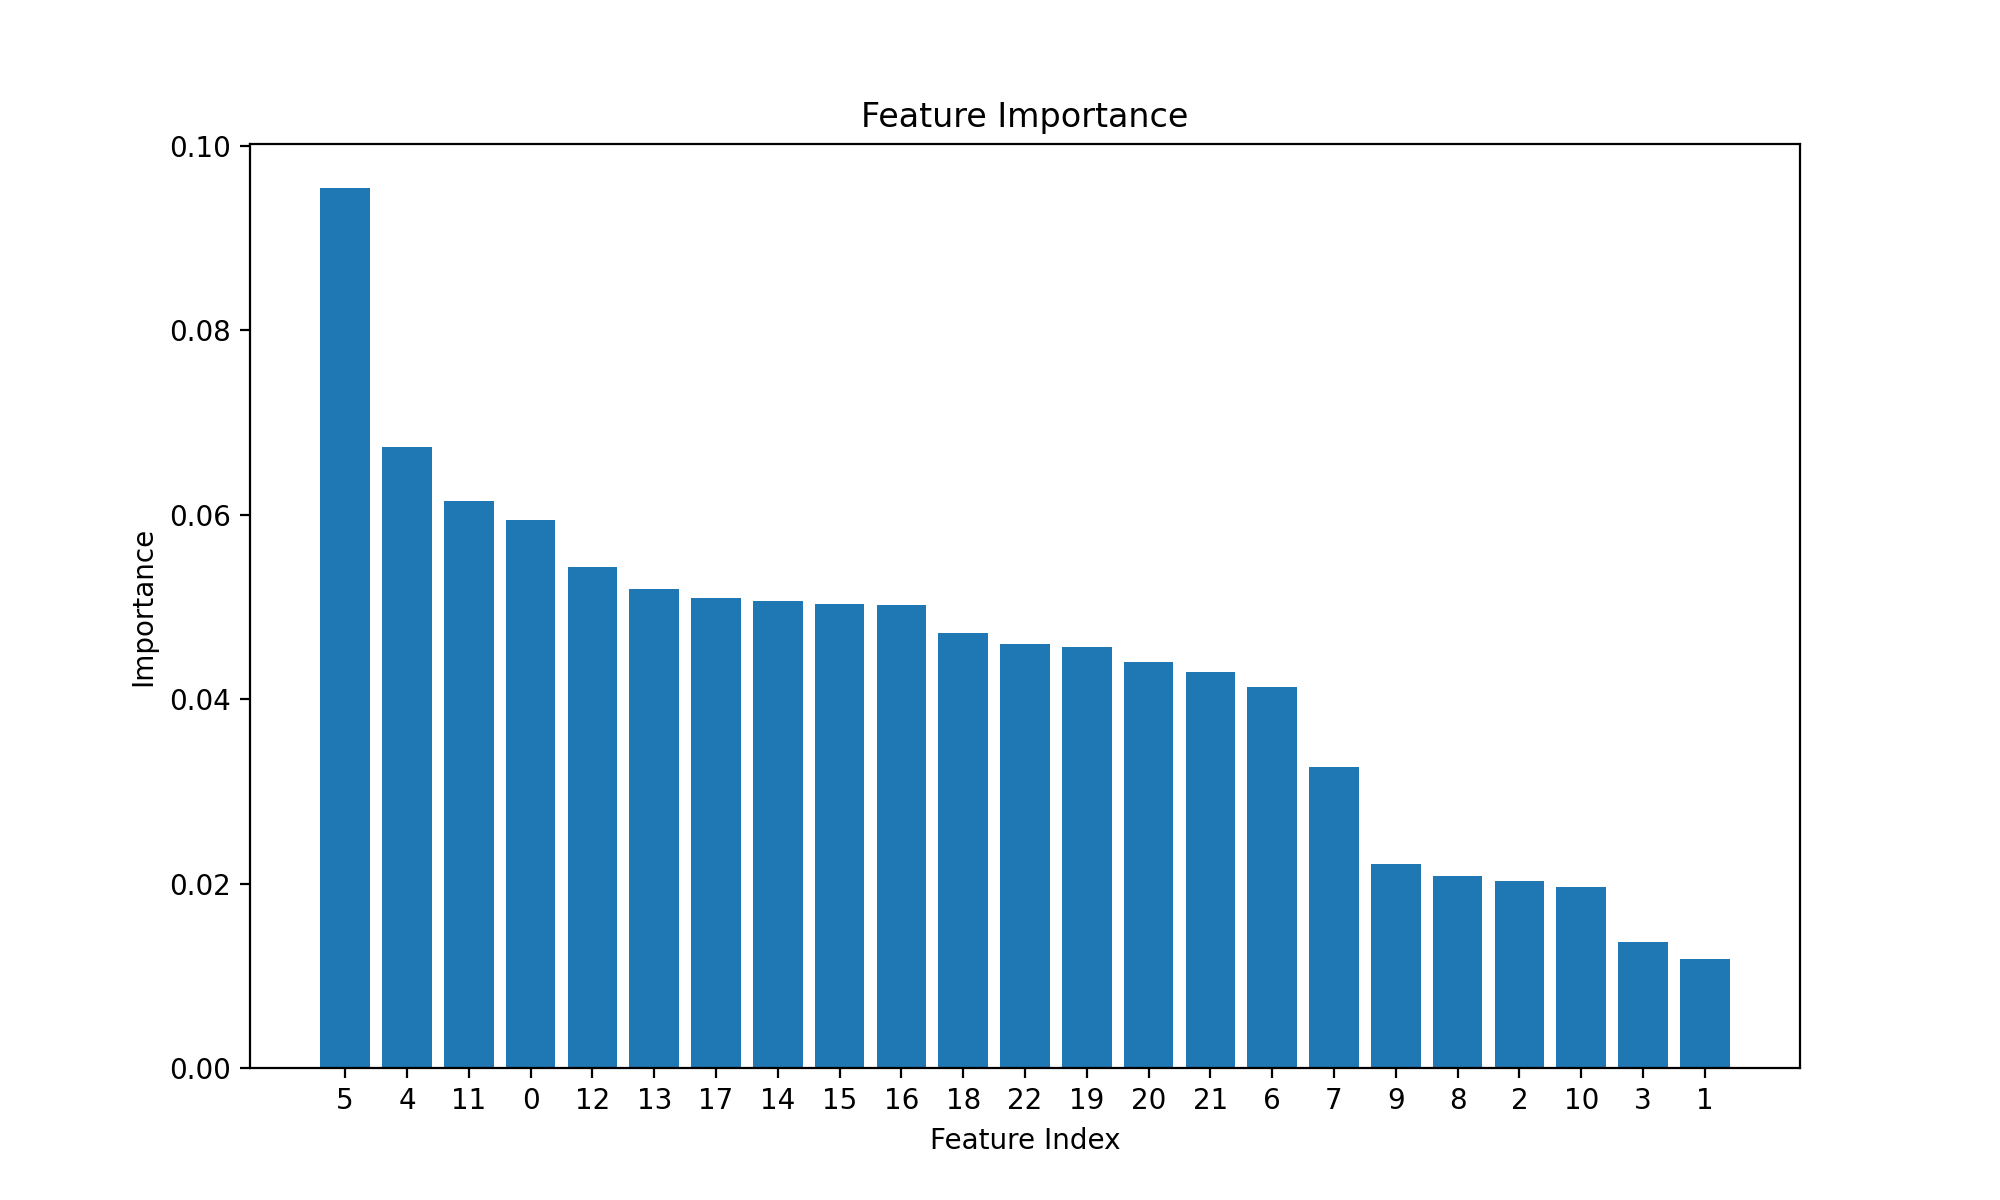

In [305]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()